<a href="https://colab.research.google.com/github/kato-taki/optimization-of-cultured-meat/blob/main/sensitivity_analysis_(1%E3%82%B5%E3%82%A4%E3%82%AF%E3%83%AB%E3%81%94%E3%81%A8%EF%BC%8Coutput_%3D_%E7%B4%B0%E8%83%9E%E5%AF%86%E5%BA%A6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SA module install

In [ ]:
pip install SALib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00


#import module

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from SALib.sample import saltelli
from SALib.analyze import sobol
import math
import time
import random
import statistics
import csv

# input value

In [ ]:
#2.1 Initial value of parameters

#動物細胞培養
#播種密度
#1サイクル目
X0_cell = 79126666 #cells/L
#最大比増殖速度
umax_cell = 0.02074 #h-1
#培地濃度
Cglc0_cell = 22.75805413 #mmol/L
Clac0_cell = 4.688425104 #mmol/L
Cgln0_cell = 1.789033333 #mmol/L
Camm0_cell = 1.244788914 #mmol/L
#培地成分（グルコース，乳酸，グルタミン，アンモニア）のΔC/ΔX（増殖した細胞数に対する生成もしくは消費された培地成分の物質量）
qglc_cell = 0.0000000519922   # ΔCglc/ΔX (mmol/cells)
qlac_cell = 0.0000000908415   # ΔClac/ΔX (mmol/cells)
qgln_cell = 0.00000000395034  # ΔCgln/ΔX (mmol/cells)
qamm_cell = 0.000000000256415 # ΔClac/ΔX (mmol/cells)


#微細藻類培養
#播種密度
#1サイクル目
X0_algae = 44476333333  #cells/L
#最大比増殖速度
umax_algae = 0.00265  #h-1
#培地濃度
Cglc0_algae = 22.75805413 #mmol/L
Clac0_algae = 27.50518058 #mmol/L
Cgln0_algae = 1.789033333 #mmol/L
Camm0_algae = 1.244788914 #mmol/L
#培地成分（乳酸，アンモニア，グルタミン）のΔC/ΔX（増殖した細胞数に対する生成された成分の物質量），グルコースは無視できると仮定
qlac_algae = 0.000000000908281    # ΔClac/ΔX (mmol/cells)
qgln_algae = 0.00000000000110727  # ΔCgln/ΔX (mmol/cells)
qamm_algae = 0.000000000082387    # ΔClac/ΔX (mmol/cells)


#藻類栄養素抽出
#酸加水分解によるグルコース抽出定数
kglc = 0.00000000105492  #mmol/cells

In [ ]:
#2.2 Standard deviation(SD) of input parameters

#動物細胞培養
#播種密度
SD_X0_cell =X0_cell*0.166
#最大比増殖速度
SD_umax_cell = umax_cell*0.122
#主要成分のΔC/ΔX
SD_qglc_cell = qglc_cell*1.67e-2
SD_qgln_cell = qgln_cell*3.47e-2
SD_qlac_cell = qlac_cell*2.30e-2
SD_qamm_cell = qamm_cell*0.161


#微細藻類培養
#播種密度
SD_X0_algae = X0_algae*1.40e-2
#最大比増殖速度
SD_umax_algae = umax_algae*6.08e-2
#主要成分のΔC/ΔX
SD_qlac_algae = qlac_algae*5.83e-2
SD_qamm_algae = qamm_algae*6.83e-2
SD_qgln_algae = qgln_algae*3.93


#微細藻類酸加水分解
#酸加水分解によるグルコース抽出定数
SD_kglc = kglc*0.1

#液性因子濃度
#動物細胞
SD_Cglc0_cell = Cglc0_cell*1.44e-2
SD_Cgln0_cell = Cgln0_cell*3.01e-2
SD_Clac0_cell = Clac0_cell*0.123
SD_Camm0_cell = Camm0_cell*5.09e-2

#微細藻類
SD_Cglc0_algae = Cglc0_algae*0.114
SD_Clac0_algae = Clac0_algae*6.22e-2
SD_Cgln0_algae = Cgln0_algae*2.60e-2
SD_Camm0_algae = Camm0_algae*5.80e-2

#2.2 coefficient of variation(CV) of input parameters
#液性因子濃度
#動物細胞
CV_Cglc0_cell = 1.44e-2
CV_Cgln0_cell = 3.01e-2
CV_Clac0_cell = 0.123
CV_Camm0_cell = 5.09e-2

#微細藻類
CV_Cglc0_algae = 0.114
CV_Clac0_algae = 6.22e-2
CV_Cgln0_algae = 2.60e-2
CV_Camm0_algae = 5.80e-2

In [ ]:
#2.3 Initial value of constants (kinetic equation)
#飽和定数KS
#動物細胞
Kglc = 0.75   #mmol/L
Kgln = 0.075  #mmol/L
#微細藻類
Kamm_algae = 0.0135 #mmol/L
#阻害定数KI
Klac_cell = 172   #mmol/L
Kamm_cell = 28.48 #mmol/L

#乳酸取り込み定数
uptake_max = 0.0000000156 #mmol/L
Klac_uptake = 1.31 #mmol/L
#グルタミン分解定数，
kd_gln = 0.000096 #h-1

In [ ]:
#2.4 Setting of section splitting
T = 48
n = 2880
h = T / n
t = np.arange(0,T,h)

# definition of function

In [ ]:
#3
#比増殖速度
#動物細胞
def get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell):
	u = umax_cell *(Cglc_cell/(Kglc+Cglc_cell*(1+Clac_cell/Klac_cell)))*(Cgln_cell/(Kgln+Cgln_cell*(1+Camm_cell/Kamm_cell)))
	return u
#藻類
def get_u_algae(Camm_algae):
	u= umax_algae *(Camm_algae/(Kamm_algae+Camm_algae))
	return u

# 1st cycle

## definition of sobol' SA function


In [ ]:
#3. sample generating of input parameters
s = 32
var = 20
scale = s * (2 * var + 2) #scale = s * (2 * var + 2)

# Define the model inputs
inputs = {
  'num_vars': var,
  'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
  'bounds': [[X0_cell, SD_X0_cell],
    [X0_algae, SD_X0_algae],
    [umax_cell, SD_umax_cell],
    [umax_algae, SD_umax_algae],
    [Cglc0_cell, SD_Cglc0_cell],
    [Cglc0_algae, SD_Cglc0_algae],
    [Clac0_cell,SD_Clac0_cell],
    [Clac0_algae,SD_Clac0_algae],
    [Cgln0_cell, SD_Cgln0_cell],
    [Cgln0_algae, SD_Cgln0_algae],
    [Camm0_cell, SD_Camm0_cell],
    [Camm0_algae, SD_Camm0_algae],
    [qglc_cell, SD_qglc_cell],
    [qlac_cell, SD_qlac_cell],
    [qlac_algae, SD_qlac_algae],
    [qgln_cell, SD_qgln_cell],
    [qgln_algae, SD_qgln_algae],
    [qamm_cell, SD_qamm_cell],
    [qamm_algae, SD_qamm_algae],
    [kglc, SD_kglc]],
  'dists': ['norm'] * var
}


param_values = saltelli.sample(inputs, scale)

<ipython-input-8-879c203ede2f>:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(inputs, scale)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1344) is equal to `2^n`.
        
  warnings.warn(msg)


## model definition

In [ ]:
#4. running model and generating output sample
def CCC_system():
  #output
  list_X = []
  list_Cglc_cell_i = []
  list_Clac_cell_i = []
  list_Cgln_cell_i = []
  list_Camm_cell_i = []
  list_Cglc_algae_i = []
  list_Clac_algae_i = []
  list_Cgln_algae_i = []
  list_Camm_algae_i = []

  for q in range(scale):

    #Input
    time  = 0
    cycle = 0
    k     = 1 #medium volume ratio
    #Input with variation
    input_X0_cell =param_values[q][0]
    input_X0_algae = param_values[q][1]
    input_umax_cell = param_values[q][2]
    input_umax_algae = param_values[q][3]
    Cglc_cell = param_values[q][4]
    Cglc_algae = param_values[q][5]
    Clac_cell = param_values[q][6]
    Clac_algae = param_values[q][7]
    Cgln_cell = param_values[q][8]
    Cgln_algae = param_values[q][9]
    Camm_cell = param_values[q][10]
    Camm_algae = param_values[q][11]
    input_qglc_cell = param_values[q][12]
    input_qlac_cell = param_values[q][13]
    input_qlac_algae = param_values[q][14]
    input_qgln_cell = param_values[q][15]
    input_qgln_algae = param_values[q][16]
    input_qamm_cell = param_values[q][17]
    input_qamm_algae = param_values[q][18]
    input_kglc = param_values[q][19]
    #Output
    #lists
    #time profile
    list_X_i = []
    list_X_algae_i = []
    list_time_i = []

    #medium concentration in algal culture after acid hydrolysis process
    list_Cglc_hydrolysis = []
    list_Clac_hydrolysis = []
    list_Cgln_hydrolysis = []
    list_Camm_hydrolysis = []
    #medium concentration in animal cells culture before medium exchange process
    list_Cglc_exchange = []
    list_Clac_exchange = []
    list_Cgln_exchange = []
    list_Camm_exchange = []

    #増殖速度式
    #動物細胞
    f = lambda X_cell,t=0 : u_cell*X_cell
    #藻類
    g = lambda X_algae,t=0 : u_algae*X_algae
    #グルタミンの分解速度式
    gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
    gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

    # 結果を返すための配列の宣言
    #細胞濃度
    #動物細胞
    ls_X_cell = np.empty(n)
    ls_X_cell[0] = input_X0_cell
    #藻類
    ls_X_algae = np.empty(n)
    ls_X_algae[0] = input_X0_algae
    #グルタミン濃度
    #動物細胞
    ls_Cgln_cell = np.empty(n)
    ls_Cgln_cell[0] = Cgln_cell
    #藻類
    ls_Cgln_algae = np.empty(n)
    ls_Cgln_algae[0] = Cgln_algae

    #リストに初期細胞密度を格納しておく
    list_X_i.append(input_X0_cell)
    list_X_algae_i.append(input_X0_algae)

    for j in range(0,n-1):

      #1. 動物細胞培養
      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae)

      #1. 動物細胞および藻類増殖時
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h


        #2.2 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #time profileリストにパラメータを格納する
        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #2. 藻類のみ増殖時
      elif get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #2.2 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #3. 動物細胞のみ増殖時
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10:
        #3.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #3.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_X_i.append(ls_X_cell[j+1])
        list_time_i.append(time)
        time += h

      else:
        #4.1 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        #4.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)
        time += h


    #酸加水分解操作，培地交換操作

    #酸加水分解操作(藻類栄養素抽出)
    #酸加水分解操作後の培地濃度
    Cglc_algae_after = Cglc_algae + 5/100*input_kglc*list_X_algae_i[-1]
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae
    #酸加水分解操作後の培地濃度をリストに格納
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)
    #培地交換前の培地濃度をリストに格納
    list_Cglc_exchange.append(Cglc_cell)
    list_Clac_exchange.append(Clac_cell)
    list_Cgln_exchange.append(Cgln_cell)
    list_Camm_exchange.append(Camm_cell)

    #培地交換操作
    #培地濃度
    #藻類
    Cglc_algae = list_Cglc_exchange[cycle]
    Clac_algae = list_Clac_exchange[cycle]
    Cgln_algae = list_Cgln_exchange[cycle]
    Camm_algae = list_Camm_exchange[cycle]

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]

    #output
    list_X.append(list_X_i[-1])
    list_Cglc_cell_i.append(Cglc_cell)
    list_Clac_cell_i.append(Clac_cell)
    list_Cgln_cell_i.append(Cgln_cell)
    list_Camm_cell_i.append(Camm_cell)
    list_Cglc_algae_i.append(Cglc_algae)
    list_Clac_algae_i.append(Clac_algae)
    list_Cgln_algae_i.append(Cgln_algae)
    list_Camm_algae_i.append(Camm_algae)

  #output
  my_list = [statistics.mean(list_Cglc_cell_i),statistics.mean(list_Clac_cell_i),statistics.mean(list_Cgln_cell_i),statistics.mean(list_Camm_cell_i),
              statistics.mean(list_Cglc_algae_i),statistics.mean(list_Clac_algae_i),statistics.mean(list_Cgln_algae_i),statistics.mean(list_Camm_algae_i),
              statistics.stdev(list_Cglc_cell_i),statistics.stdev(list_Clac_cell_i),statistics.stdev(list_Cgln_cell_i),statistics.stdev(list_Camm_cell_i),
              statistics.stdev(list_Cglc_algae_i),statistics.stdev(list_Clac_algae_i),statistics.stdev(list_Cgln_algae_i),statistics.stdev(list_Camm_algae_i)]

  return list_X,my_list

## model output

In [ ]:
result_X,result_medium = CCC_system()

#培地濃度
#next input value
Cglc0_cell = result_medium[0]
Clac0_cell = result_medium[1]
Cgln0_cell = result_medium[2]
Camm0_cell = result_medium[3]
Cglc0_algae = result_medium[4]
Clac0_algae = result_medium[5]
Cgln0_algae = result_medium[6]
Camm0_algae = result_medium[7]

#next input standard deviation
SD_Cglc0_cell = result_medium[8]
SD_Clac0_cell = result_medium[9]
SD_Cgln0_cell = result_medium[10]
SD_Camm0_cell = result_medium[11]
SD_Cglc0_algae = result_medium[12]
SD_Clac0_algae = result_medium[13]
SD_Cgln0_algae = result_medium[14]
SD_Camm0_algae = result_medium[15]

## sensitivity analysis (ranking system)

               ST       ST_conf
x1   9.668360e-01  3.034889e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   9.069437e-06  7.707078e-06
x6   0.000000e+00  0.000000e+00
x7   2.365041e-04  1.533750e-04
x8   0.000000e+00  0.000000e+00
x9   4.931167e-05  3.352193e-05
x10  0.000000e+00  0.000000e+00
x11  1.018097e-04  9.502651e-05
x12  0.000000e+00  0.000000e+00
x13  1.128152e-07  9.915993e-08
x14  4.936252e-06  3.713469e-06
x15  0.000000e+00  0.000000e+00
x16  7.944417e-07  4.806875e-07
x17  0.000000e+00  0.000000e+00
x18  5.864952e-08  3.984184e-08
x19  0.000000e+00  0.000000e+00
x20  0.000000e+00  0.000000e+00
           S1   S1_conf
x1   0.910050  0.500542
x2   0.000000  0.000000
x3   0.000000  0.000000
x4   0.000000  0.000000
x5   0.000068  0.001915
x6   0.000000  0.000000
x7  -0.011547  0.010111
x8   0.000000  0.000000
x9   0.003201  0.004052
x10  0.000000  0.000000
x11  0.000043  0.003878
x12  0.000000  0.000000
x13 -0.000045  0

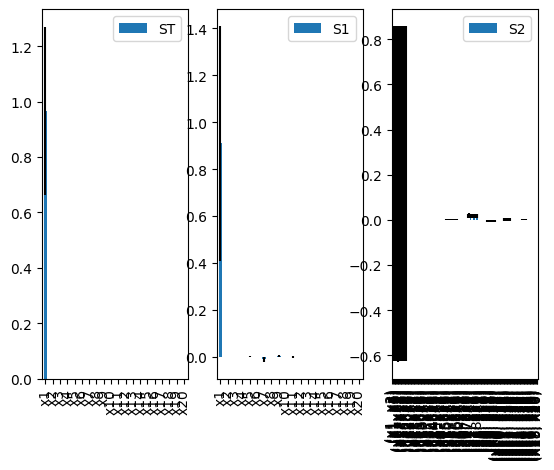

In [ ]:
# Read samples Y
Y = np.array(result_X)


# Perform analysis (auto display)
Si = sobol.analyze(inputs, Y, print_to_console=True)


Si.plot()
plot.show()

# 2nd cycle

## definition of sobol' SA function


In [ ]:
#3. sample generating of input parameters
s = 32
var = 20
scale = s * (2 * var + 2) #scale = s * (2 * var + 2)

# Define the model inputs
inputs = {
  'num_vars': var,
  'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
  'bounds': [[X0_cell, SD_X0_cell],
    [X0_algae, SD_X0_algae],
    [umax_cell, SD_umax_cell],
    [umax_algae, SD_umax_algae],
    [Cglc0_cell, SD_Cglc0_cell],
    [Cglc0_algae, SD_Cglc0_algae],
    [Clac0_cell,SD_Clac0_cell],
    [Clac0_algae,SD_Clac0_algae],
    [Cgln0_cell, SD_Cgln0_cell],
    [Cgln0_algae, SD_Cgln0_algae],
    [Camm0_cell, SD_Camm0_cell],
    [Camm0_algae, SD_Camm0_algae],
    [qglc_cell, SD_qglc_cell],
    [qlac_cell, SD_qlac_cell],
    [qlac_algae, SD_qlac_algae],
    [qgln_cell, SD_qgln_cell],
    [qgln_algae, SD_qgln_algae],
    [qamm_cell, SD_qamm_cell],
    [qamm_algae, SD_qamm_algae],
    [kglc, SD_kglc]],
  'dists': ['norm'] * var
}


param_values = saltelli.sample(inputs, scale)

<ipython-input-12-879c203ede2f>:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(inputs, scale)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1344) is equal to `2^n`.
        
  warnings.warn(msg)


## model definition

In [ ]:
#4. running model and generating output sample
def CCC_system():
  #output
  list_X = []
  list_Cglc_cell_i = []
  list_Clac_cell_i = []
  list_Cgln_cell_i = []
  list_Camm_cell_i = []
  list_Cglc_algae_i = []
  list_Clac_algae_i = []
  list_Cgln_algae_i = []
  list_Camm_algae_i = []

  for q in range(scale):

    #Input
    time  = 0
    cycle = 0
    k     = 1 #medium volume ratio
    #Input with variation
    input_X0_cell =param_values[q][0]
    input_X0_algae = param_values[q][1]
    input_umax_cell = param_values[q][2]
    input_umax_algae = param_values[q][3]
    Cglc_cell = param_values[q][4]
    Cglc_algae = param_values[q][5]
    Clac_cell = param_values[q][6]
    Clac_algae = param_values[q][7]
    Cgln_cell = param_values[q][8]
    Cgln_algae = param_values[q][9]
    Camm_cell = param_values[q][10]
    Camm_algae = param_values[q][11]
    input_qglc_cell = param_values[q][12]
    input_qlac_cell = param_values[q][13]
    input_qlac_algae = param_values[q][14]
    input_qgln_cell = param_values[q][15]
    input_qgln_algae = param_values[q][16]
    input_qamm_cell = param_values[q][17]
    input_qamm_algae = param_values[q][18]
    input_kglc = param_values[q][19]
    #Output
    #lists
    #time profile
    list_X_i = []
    list_X_algae_i = []
    list_time_i = []

    #medium concentration in algal culture after acid hydrolysis process
    list_Cglc_hydrolysis = []
    list_Clac_hydrolysis = []
    list_Cgln_hydrolysis = []
    list_Camm_hydrolysis = []
    #medium concentration in animal cells culture before medium exchange process
    list_Cglc_exchange = []
    list_Clac_exchange = []
    list_Cgln_exchange = []
    list_Camm_exchange = []

    #増殖速度式
    #動物細胞
    f = lambda X_cell,t=0 : u_cell*X_cell
    #藻類
    g = lambda X_algae,t=0 : u_algae*X_algae
    #グルタミンの分解速度式
    gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
    gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

    # 結果を返すための配列の宣言
    #細胞濃度
    #動物細胞
    ls_X_cell = np.empty(n)
    ls_X_cell[0] = input_X0_cell
    #藻類
    ls_X_algae = np.empty(n)
    ls_X_algae[0] = input_X0_algae
    #グルタミン濃度
    #動物細胞
    ls_Cgln_cell = np.empty(n)
    ls_Cgln_cell[0] = Cgln_cell
    #藻類
    ls_Cgln_algae = np.empty(n)
    ls_Cgln_algae[0] = Cgln_algae

    #リストに初期細胞密度を格納しておく
    list_X_i.append(input_X0_cell)
    list_X_algae_i.append(input_X0_algae)

    for j in range(0,n-1):

      #1. 動物細胞培養
      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae)

      #1. 動物細胞および藻類増殖時
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h


        #2.2 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #time profileリストにパラメータを格納する
        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #2. 藻類のみ増殖時
      elif get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #2.2 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #3. 動物細胞のみ増殖時
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10:
        #3.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #3.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_X_i.append(ls_X_cell[j+1])
        list_time_i.append(time)
        time += h

      else:
        #4.1 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        #4.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)
        time += h


    #酸加水分解操作，培地交換操作

    #酸加水分解操作(藻類栄養素抽出)
    #酸加水分解操作後の培地濃度
    Cglc_algae_after = Cglc_algae + 5/100*input_kglc*list_X_algae_i[-1]
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae
    #酸加水分解操作後の培地濃度をリストに格納
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)
    #培地交換前の培地濃度をリストに格納
    list_Cglc_exchange.append(Cglc_cell)
    list_Clac_exchange.append(Clac_cell)
    list_Cgln_exchange.append(Cgln_cell)
    list_Camm_exchange.append(Camm_cell)

    #培地交換操作
    #培地濃度
    #藻類
    Cglc_algae = list_Cglc_exchange[cycle]
    Clac_algae = list_Clac_exchange[cycle]
    Cgln_algae = list_Cgln_exchange[cycle]
    Camm_algae = list_Camm_exchange[cycle]

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]

    #output
    list_X.append(list_X_i[-1])
    list_Cglc_cell_i.append(Cglc_cell)
    list_Clac_cell_i.append(Clac_cell)
    list_Cgln_cell_i.append(Cgln_cell)
    list_Camm_cell_i.append(Camm_cell)
    list_Cglc_algae_i.append(Cglc_algae)
    list_Clac_algae_i.append(Clac_algae)
    list_Cgln_algae_i.append(Cgln_algae)
    list_Camm_algae_i.append(Camm_algae)

  #output
  my_list = [statistics.mean(list_Cglc_cell_i),statistics.mean(list_Clac_cell_i),statistics.mean(list_Cgln_cell_i),statistics.mean(list_Camm_cell_i),
              statistics.mean(list_Cglc_algae_i),statistics.mean(list_Clac_algae_i),statistics.mean(list_Cgln_algae_i),statistics.mean(list_Camm_algae_i),
              statistics.stdev(list_Cglc_cell_i),statistics.stdev(list_Clac_cell_i),statistics.stdev(list_Cgln_cell_i),statistics.stdev(list_Camm_cell_i),
              statistics.stdev(list_Cglc_algae_i),statistics.stdev(list_Clac_algae_i),statistics.stdev(list_Cgln_algae_i),statistics.stdev(list_Camm_algae_i)]

  return list_X,my_list

## model output

In [ ]:
result_X,result_medium = CCC_system()

#培地濃度
#next input value
Cglc0_cell = result_medium[0]
Clac0_cell = result_medium[1]
Cgln0_cell = result_medium[2]
Camm0_cell = result_medium[3]
Cglc0_algae = result_medium[4]
Clac0_algae = result_medium[5]
Cgln0_algae = result_medium[6]
Camm0_algae = result_medium[7]

#next input standard deviation
SD_Cglc0_cell = result_medium[8]
SD_Clac0_cell = result_medium[9]
SD_Cgln0_cell = result_medium[10]
SD_Camm0_cell = result_medium[11]
SD_Cglc0_algae = result_medium[12]
SD_Clac0_algae = result_medium[13]
SD_Cgln0_algae = result_medium[14]
SD_Camm0_algae = result_medium[15]

## sensitivity analysis (ranking system)

               ST       ST_conf
x1   9.630168e-01  3.392597e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   2.723027e-04  2.385032e-04
x6   0.000000e+00  0.000000e+00
x7   1.422610e-03  9.590775e-04
x8   0.000000e+00  0.000000e+00
x9   4.086459e-05  2.465887e-05
x10  0.000000e+00  0.000000e+00
x11  1.435188e-04  1.414871e-04
x12  0.000000e+00  0.000000e+00
x13  4.009346e-08  4.117829e-08
x14  3.024920e-06  2.196627e-06
x15  0.000000e+00  0.000000e+00
x16  5.512830e-07  3.114009e-07
x17  0.000000e+00  0.000000e+00
x18  4.417270e-08  2.876105e-08
x19  0.000000e+00  0.000000e+00
x20  0.000000e+00  0.000000e+00
           S1   S1_conf
x1   0.914689  0.520154
x2   0.000000  0.000000
x3   0.000000  0.000000
x4   0.000000  0.000000
x5   0.000189  0.009522
x6   0.000000  0.000000
x7  -0.027651  0.024463
x8   0.000000  0.000000
x9   0.002823  0.004125
x10  0.000000  0.000000
x11  0.000120  0.005559
x12  0.000000  0.000000
x13 -0.000019  0

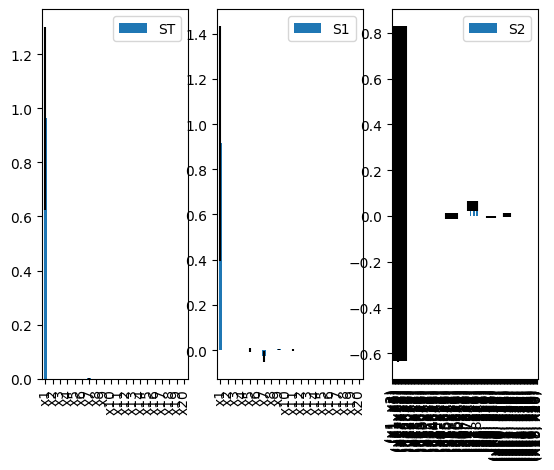

In [ ]:
# Read samples Y
Y = np.array(result_X)


# Perform analysis (auto display)
Si = sobol.analyze(inputs, Y, print_to_console=True)


Si.plot()
plot.show()

# 3rd cycle

## definition of sobol' SA function


In [ ]:
#3. sample generating of input parameters
s = 32
var = 20
scale = s * (2 * var + 2) #scale = s * (2 * var + 2)

# Define the model inputs
inputs = {
  'num_vars': var,
  'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
  'bounds': [[X0_cell, SD_X0_cell],
    [X0_algae, SD_X0_algae],
    [umax_cell, SD_umax_cell],
    [umax_algae, SD_umax_algae],
    [Cglc0_cell, SD_Cglc0_cell],
    [Cglc0_algae, SD_Cglc0_algae],
    [Clac0_cell,SD_Clac0_cell],
    [Clac0_algae,SD_Clac0_algae],
    [Cgln0_cell, SD_Cgln0_cell],
    [Cgln0_algae, SD_Cgln0_algae],
    [Camm0_cell, SD_Camm0_cell],
    [Camm0_algae, SD_Camm0_algae],
    [qglc_cell, SD_qglc_cell],
    [qlac_cell, SD_qlac_cell],
    [qlac_algae, SD_qlac_algae],
    [qgln_cell, SD_qgln_cell],
    [qgln_algae, SD_qgln_algae],
    [qamm_cell, SD_qamm_cell],
    [qamm_algae, SD_qamm_algae],
    [kglc, SD_kglc]],
  'dists': ['norm'] * var
}


param_values = saltelli.sample(inputs, scale)

<ipython-input-16-879c203ede2f>:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(inputs, scale)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1344) is equal to `2^n`.
        
  warnings.warn(msg)


## model definition

In [ ]:
#4. running model and generating output sample
def CCC_system():
  #output
  list_X = []
  list_Cglc_cell_i = []
  list_Clac_cell_i = []
  list_Cgln_cell_i = []
  list_Camm_cell_i = []
  list_Cglc_algae_i = []
  list_Clac_algae_i = []
  list_Cgln_algae_i = []
  list_Camm_algae_i = []

  for q in range(scale):

    #Input
    time  = 0
    cycle = 0
    k     = 1 #medium volume ratio
    #Input with variation
    input_X0_cell =param_values[q][0]
    input_X0_algae = param_values[q][1]
    input_umax_cell = param_values[q][2]
    input_umax_algae = param_values[q][3]
    Cglc_cell = param_values[q][4]
    Cglc_algae = param_values[q][5]
    Clac_cell = param_values[q][6]
    Clac_algae = param_values[q][7]
    Cgln_cell = param_values[q][8]
    Cgln_algae = param_values[q][9]
    Camm_cell = param_values[q][10]
    Camm_algae = param_values[q][11]
    input_qglc_cell = param_values[q][12]
    input_qlac_cell = param_values[q][13]
    input_qlac_algae = param_values[q][14]
    input_qgln_cell = param_values[q][15]
    input_qgln_algae = param_values[q][16]
    input_qamm_cell = param_values[q][17]
    input_qamm_algae = param_values[q][18]
    input_kglc = param_values[q][19]
    #Output
    #lists
    #time profile
    list_X_i = []
    list_X_algae_i = []
    list_time_i = []

    #medium concentration in algal culture after acid hydrolysis process
    list_Cglc_hydrolysis = []
    list_Clac_hydrolysis = []
    list_Cgln_hydrolysis = []
    list_Camm_hydrolysis = []
    #medium concentration in animal cells culture before medium exchange process
    list_Cglc_exchange = []
    list_Clac_exchange = []
    list_Cgln_exchange = []
    list_Camm_exchange = []

    #増殖速度式
    #動物細胞
    f = lambda X_cell,t=0 : u_cell*X_cell
    #藻類
    g = lambda X_algae,t=0 : u_algae*X_algae
    #グルタミンの分解速度式
    gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
    gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

    # 結果を返すための配列の宣言
    #細胞濃度
    #動物細胞
    ls_X_cell = np.empty(n)
    ls_X_cell[0] = input_X0_cell
    #藻類
    ls_X_algae = np.empty(n)
    ls_X_algae[0] = input_X0_algae
    #グルタミン濃度
    #動物細胞
    ls_Cgln_cell = np.empty(n)
    ls_Cgln_cell[0] = Cgln_cell
    #藻類
    ls_Cgln_algae = np.empty(n)
    ls_Cgln_algae[0] = Cgln_algae

    #リストに初期細胞密度を格納しておく
    list_X_i.append(input_X0_cell)
    list_X_algae_i.append(input_X0_algae)

    for j in range(0,n-1):

      #1. 動物細胞培養
      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae)

      #1. 動物細胞および藻類増殖時
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h


        #2.2 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #time profileリストにパラメータを格納する
        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #2. 藻類のみ増殖時
      elif get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #2.2 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #3. 動物細胞のみ増殖時
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10:
        #3.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #3.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_X_i.append(ls_X_cell[j+1])
        list_time_i.append(time)
        time += h

      else:
        #4.1 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        #4.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)
        time += h


    #酸加水分解操作，培地交換操作

    #酸加水分解操作(藻類栄養素抽出)
    #酸加水分解操作後の培地濃度
    Cglc_algae_after = Cglc_algae + 5/100*input_kglc*list_X_algae_i[-1]
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae
    #酸加水分解操作後の培地濃度をリストに格納
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)
    #培地交換前の培地濃度をリストに格納
    list_Cglc_exchange.append(Cglc_cell)
    list_Clac_exchange.append(Clac_cell)
    list_Cgln_exchange.append(Cgln_cell)
    list_Camm_exchange.append(Camm_cell)

    #培地交換操作
    #培地濃度
    #藻類
    Cglc_algae = list_Cglc_exchange[cycle]
    Clac_algae = list_Clac_exchange[cycle]
    Cgln_algae = list_Cgln_exchange[cycle]
    Camm_algae = list_Camm_exchange[cycle]

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]

    #output
    list_X.append(list_X_i[-1])
    list_Cglc_cell_i.append(Cglc_cell)
    list_Clac_cell_i.append(Clac_cell)
    list_Cgln_cell_i.append(Cgln_cell)
    list_Camm_cell_i.append(Camm_cell)
    list_Cglc_algae_i.append(Cglc_algae)
    list_Clac_algae_i.append(Clac_algae)
    list_Cgln_algae_i.append(Cgln_algae)
    list_Camm_algae_i.append(Camm_algae)

  #output
  my_list = [statistics.mean(list_Cglc_cell_i),statistics.mean(list_Clac_cell_i),statistics.mean(list_Cgln_cell_i),statistics.mean(list_Camm_cell_i),
              statistics.mean(list_Cglc_algae_i),statistics.mean(list_Clac_algae_i),statistics.mean(list_Cgln_algae_i),statistics.mean(list_Camm_algae_i),
              statistics.stdev(list_Cglc_cell_i),statistics.stdev(list_Clac_cell_i),statistics.stdev(list_Cgln_cell_i),statistics.stdev(list_Camm_cell_i),
              statistics.stdev(list_Cglc_algae_i),statistics.stdev(list_Clac_algae_i),statistics.stdev(list_Cgln_algae_i),statistics.stdev(list_Camm_algae_i)]

  return list_X,my_list

## model output

In [ ]:
result_X,result_medium = CCC_system()

#培地濃度
#next input value
Cglc0_cell = result_medium[0]
Clac0_cell = result_medium[1]
Cgln0_cell = result_medium[2]
Camm0_cell = result_medium[3]
Cglc0_algae = result_medium[4]
Clac0_algae = result_medium[5]
Cgln0_algae = result_medium[6]
Camm0_algae = result_medium[7]

#next input standard deviation
SD_Cglc0_cell = result_medium[8]
SD_Clac0_cell = result_medium[9]
SD_Cgln0_cell = result_medium[10]
SD_Camm0_cell = result_medium[11]
SD_Cglc0_algae = result_medium[12]
SD_Clac0_algae = result_medium[13]
SD_Cgln0_algae = result_medium[14]
SD_Camm0_algae = result_medium[15]

## sensitivity analysis (ranking system)

               ST       ST_conf
x1   9.607132e-01  2.872958e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   1.250796e-04  9.362979e-05
x6   0.000000e+00  0.000000e+00
x7   1.590236e-03  1.083131e-03
x8   0.000000e+00  0.000000e+00
x9   3.799020e-04  2.559378e-04
x10  0.000000e+00  0.000000e+00
x11  1.271914e-04  1.180755e-04
x12  0.000000e+00  0.000000e+00
x13  1.685570e-07  1.581275e-07
x14  4.109192e-06  3.486899e-06
x15  0.000000e+00  0.000000e+00
x16  2.538269e-06  1.810035e-06
x17  0.000000e+00  0.000000e+00
x18  5.107243e-08  3.006109e-08
x19  0.000000e+00  0.000000e+00
x20  0.000000e+00  0.000000e+00
           S1   S1_conf
x1   0.912513  0.528546
x2   0.000000  0.000000
x3   0.000000  0.000000
x4   0.000000  0.000000
x5   0.000226  0.006128
x6   0.000000  0.000000
x7  -0.029366  0.025954
x8   0.000000  0.000000
x9   0.008449  0.012301
x10  0.000000  0.000000
x11  0.000142  0.004823
x12  0.000000  0.000000
x13 -0.000051  0

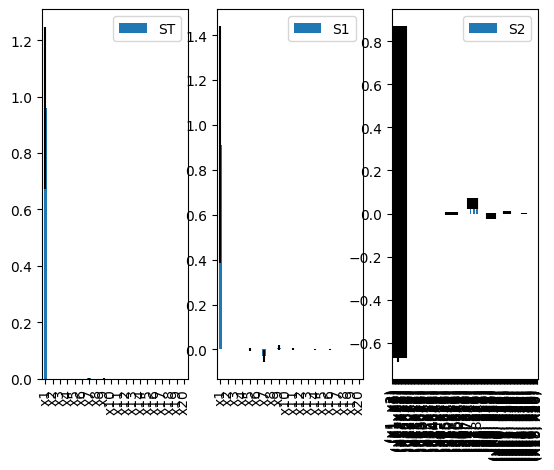

In [ ]:
# Read samples Y
Y = np.array(result_X)


# Perform analysis (auto display)
Si = sobol.analyze(inputs, Y, print_to_console=True)


Si.plot()
plot.show()

# 4th cycle

## definition of sobol' SA function


In [ ]:
#3. sample generating of input parameters
s = 32
var = 20
scale = s * (2 * var + 2) #scale = s * (2 * var + 2)

# Define the model inputs
inputs = {
  'num_vars': var,
  'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
  'bounds': [[X0_cell, SD_X0_cell],
    [X0_algae, SD_X0_algae],
    [umax_cell, SD_umax_cell],
    [umax_algae, SD_umax_algae],
    [Cglc0_cell, SD_Cglc0_cell],
    [Cglc0_algae, SD_Cglc0_algae],
    [Clac0_cell,SD_Clac0_cell],
    [Clac0_algae,SD_Clac0_algae],
    [Cgln0_cell, SD_Cgln0_cell],
    [Cgln0_algae, SD_Cgln0_algae],
    [Camm0_cell, SD_Camm0_cell],
    [Camm0_algae, SD_Camm0_algae],
    [qglc_cell, SD_qglc_cell],
    [qlac_cell, SD_qlac_cell],
    [qlac_algae, SD_qlac_algae],
    [qgln_cell, SD_qgln_cell],
    [qgln_algae, SD_qgln_algae],
    [qamm_cell, SD_qamm_cell],
    [qamm_algae, SD_qamm_algae],
    [kglc, SD_kglc]],
  'dists': ['norm'] * var
}


param_values = saltelli.sample(inputs, scale)

<ipython-input-20-879c203ede2f>:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(inputs, scale)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1344) is equal to `2^n`.
        
  warnings.warn(msg)


## model definition

In [ ]:
#4. running model and generating output sample
def CCC_system():
  #output
  list_X = []
  list_Cglc_cell_i = []
  list_Clac_cell_i = []
  list_Cgln_cell_i = []
  list_Camm_cell_i = []
  list_Cglc_algae_i = []
  list_Clac_algae_i = []
  list_Cgln_algae_i = []
  list_Camm_algae_i = []

  for q in range(scale):

    #Input
    time  = 0
    cycle = 0
    k     = 1 #medium volume ratio
    #Input with variation
    input_X0_cell =param_values[q][0]
    input_X0_algae = param_values[q][1]
    input_umax_cell = param_values[q][2]
    input_umax_algae = param_values[q][3]
    Cglc_cell = param_values[q][4]
    Cglc_algae = param_values[q][5]
    Clac_cell = param_values[q][6]
    Clac_algae = param_values[q][7]
    Cgln_cell = param_values[q][8]
    Cgln_algae = param_values[q][9]
    Camm_cell = param_values[q][10]
    Camm_algae = param_values[q][11]
    input_qglc_cell = param_values[q][12]
    input_qlac_cell = param_values[q][13]
    input_qlac_algae = param_values[q][14]
    input_qgln_cell = param_values[q][15]
    input_qgln_algae = param_values[q][16]
    input_qamm_cell = param_values[q][17]
    input_qamm_algae = param_values[q][18]
    input_kglc = param_values[q][19]
    #Output
    #lists
    #time profile
    list_X_i = []
    list_X_algae_i = []
    list_time_i = []

    #medium concentration in algal culture after acid hydrolysis process
    list_Cglc_hydrolysis = []
    list_Clac_hydrolysis = []
    list_Cgln_hydrolysis = []
    list_Camm_hydrolysis = []
    #medium concentration in animal cells culture before medium exchange process
    list_Cglc_exchange = []
    list_Clac_exchange = []
    list_Cgln_exchange = []
    list_Camm_exchange = []

    #増殖速度式
    #動物細胞
    f = lambda X_cell,t=0 : u_cell*X_cell
    #藻類
    g = lambda X_algae,t=0 : u_algae*X_algae
    #グルタミンの分解速度式
    gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
    gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

    # 結果を返すための配列の宣言
    #細胞濃度
    #動物細胞
    ls_X_cell = np.empty(n)
    ls_X_cell[0] = input_X0_cell
    #藻類
    ls_X_algae = np.empty(n)
    ls_X_algae[0] = input_X0_algae
    #グルタミン濃度
    #動物細胞
    ls_Cgln_cell = np.empty(n)
    ls_Cgln_cell[0] = Cgln_cell
    #藻類
    ls_Cgln_algae = np.empty(n)
    ls_Cgln_algae[0] = Cgln_algae

    #リストに初期細胞密度を格納しておく
    list_X_i.append(input_X0_cell)
    list_X_algae_i.append(input_X0_algae)

    for j in range(0,n-1):

      #1. 動物細胞培養
      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae)

      #1. 動物細胞および藻類増殖時
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h


        #2.2 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #time profileリストにパラメータを格納する
        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #2. 藻類のみ増殖時
      elif get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #2.2 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #3. 動物細胞のみ増殖時
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10:
        #3.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #3.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_X_i.append(ls_X_cell[j+1])
        list_time_i.append(time)
        time += h

      else:
        #4.1 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        #4.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)
        time += h


    #酸加水分解操作，培地交換操作

    #酸加水分解操作(藻類栄養素抽出)
    #酸加水分解操作後の培地濃度
    Cglc_algae_after = Cglc_algae + 5/100*input_kglc*list_X_algae_i[-1]
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae
    #酸加水分解操作後の培地濃度をリストに格納
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)
    #培地交換前の培地濃度をリストに格納
    list_Cglc_exchange.append(Cglc_cell)
    list_Clac_exchange.append(Clac_cell)
    list_Cgln_exchange.append(Cgln_cell)
    list_Camm_exchange.append(Camm_cell)

    #培地交換操作
    #培地濃度
    #藻類
    Cglc_algae = list_Cglc_exchange[cycle]
    Clac_algae = list_Clac_exchange[cycle]
    Cgln_algae = list_Cgln_exchange[cycle]
    Camm_algae = list_Camm_exchange[cycle]

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]

    #output
    list_X.append(list_X_i[-1])
    list_Cglc_cell_i.append(Cglc_cell)
    list_Clac_cell_i.append(Clac_cell)
    list_Cgln_cell_i.append(Cgln_cell)
    list_Camm_cell_i.append(Camm_cell)
    list_Cglc_algae_i.append(Cglc_algae)
    list_Clac_algae_i.append(Clac_algae)
    list_Cgln_algae_i.append(Cgln_algae)
    list_Camm_algae_i.append(Camm_algae)

  #output
  my_list = [statistics.mean(list_Cglc_cell_i),statistics.mean(list_Clac_cell_i),statistics.mean(list_Cgln_cell_i),statistics.mean(list_Camm_cell_i),
              statistics.mean(list_Cglc_algae_i),statistics.mean(list_Clac_algae_i),statistics.mean(list_Cgln_algae_i),statistics.mean(list_Camm_algae_i),
              statistics.stdev(list_Cglc_cell_i),statistics.stdev(list_Clac_cell_i),statistics.stdev(list_Cgln_cell_i),statistics.stdev(list_Camm_cell_i),
              statistics.stdev(list_Cglc_algae_i),statistics.stdev(list_Clac_algae_i),statistics.stdev(list_Cgln_algae_i),statistics.stdev(list_Camm_algae_i)]

  return list_X,my_list

## model output

In [ ]:
result_X,result_medium = CCC_system()

#培地濃度
#next input value
Cglc0_cell = result_medium[0]
Clac0_cell = result_medium[1]
Cgln0_cell = result_medium[2]
Camm0_cell = result_medium[3]
Cglc0_algae = result_medium[4]
Clac0_algae = result_medium[5]
Cgln0_algae = result_medium[6]
Camm0_algae = result_medium[7]

#next input standard deviation
SD_Cglc0_cell = result_medium[8]
SD_Clac0_cell = result_medium[9]
SD_Cgln0_cell = result_medium[10]
SD_Camm0_cell = result_medium[11]
SD_Cglc0_algae = result_medium[12]
SD_Clac0_algae = result_medium[13]
SD_Cgln0_algae = result_medium[14]
SD_Camm0_algae = result_medium[15]

## sensitivity analysis (ranking system)

               ST       ST_conf
x1   9.594390e-01  3.214150e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   4.038300e-04  3.117737e-04
x6   0.000000e+00  0.000000e+00
x7   2.074275e-03  1.354061e-03
x8   0.000000e+00  0.000000e+00
x9   2.653861e-04  1.519355e-04
x10  0.000000e+00  0.000000e+00
x11  1.615328e-04  1.213228e-04
x12  0.000000e+00  0.000000e+00
x13  5.485122e-08  4.412367e-08
x14  2.693259e-06  2.133624e-06
x15  0.000000e+00  0.000000e+00
x16  1.603289e-06  8.675796e-07
x17  0.000000e+00  0.000000e+00
x18  4.059159e-08  2.637784e-08
x19  0.000000e+00  0.000000e+00
x20  0.000000e+00  0.000000e+00
           S1   S1_conf
x1   0.914485  0.498058
x2   0.000000  0.000000
x3   0.000000  0.000000
x4   0.000000  0.000000
x5   0.000181  0.011360
x6   0.000000  0.000000
x7  -0.033316  0.029278
x8   0.000000  0.000000
x9   0.007016  0.009463
x10  0.000000  0.000000
x11  0.000178  0.005338
x12  0.000000  0.000000
x13 -0.000022  0

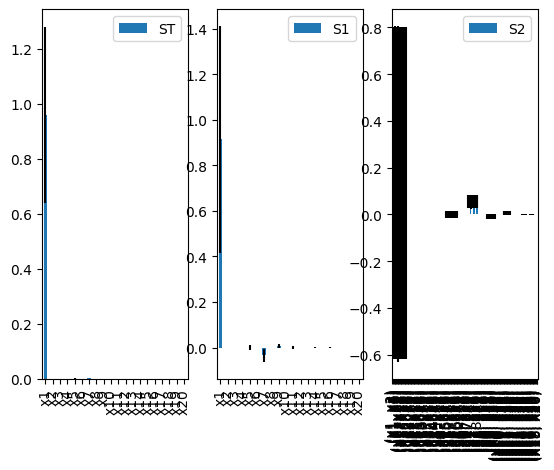

In [ ]:
# Read samples Y
Y = np.array(result_X)


# Perform analysis (auto display)
Si = sobol.analyze(inputs, Y, print_to_console=True)


Si.plot()
plot.show()

# 5th cycle

## definition of sobol' SA function


In [ ]:
#3. sample generating of input parameters
s = 32
var = 20
scale = s * (2 * var + 2) #scale = s * (2 * var + 2)

# Define the model inputs
inputs = {
  'num_vars': var,
  'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
  'bounds': [[X0_cell, SD_X0_cell],
    [X0_algae, SD_X0_algae],
    [umax_cell, SD_umax_cell],
    [umax_algae, SD_umax_algae],
    [Cglc0_cell, SD_Cglc0_cell],
    [Cglc0_algae, SD_Cglc0_algae],
    [Clac0_cell,SD_Clac0_cell],
    [Clac0_algae,SD_Clac0_algae],
    [Cgln0_cell, SD_Cgln0_cell],
    [Cgln0_algae, SD_Cgln0_algae],
    [Camm0_cell, SD_Camm0_cell],
    [Camm0_algae, SD_Camm0_algae],
    [qglc_cell, SD_qglc_cell],
    [qlac_cell, SD_qlac_cell],
    [qlac_algae, SD_qlac_algae],
    [qgln_cell, SD_qgln_cell],
    [qgln_algae, SD_qgln_algae],
    [qamm_cell, SD_qamm_cell],
    [qamm_algae, SD_qamm_algae],
    [kglc, SD_kglc]],
  'dists': ['norm'] * var
}


param_values = saltelli.sample(inputs, scale)

<ipython-input-24-879c203ede2f>:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(inputs, scale)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1344) is equal to `2^n`.
        
  warnings.warn(msg)


## model definition

In [ ]:
#4. running model and generating output sample
def CCC_system():
  #output
  list_X = []
  list_Cglc_cell_i = []
  list_Clac_cell_i = []
  list_Cgln_cell_i = []
  list_Camm_cell_i = []
  list_Cglc_algae_i = []
  list_Clac_algae_i = []
  list_Cgln_algae_i = []
  list_Camm_algae_i = []

  for q in range(scale):

    #Input
    time  = 0
    cycle = 0
    k     = 1 #medium volume ratio
    #Input with variation
    input_X0_cell =param_values[q][0]
    input_X0_algae = param_values[q][1]
    input_umax_cell = param_values[q][2]
    input_umax_algae = param_values[q][3]
    Cglc_cell = param_values[q][4]
    Cglc_algae = param_values[q][5]
    Clac_cell = param_values[q][6]
    Clac_algae = param_values[q][7]
    Cgln_cell = param_values[q][8]
    Cgln_algae = param_values[q][9]
    Camm_cell = param_values[q][10]
    Camm_algae = param_values[q][11]
    input_qglc_cell = param_values[q][12]
    input_qlac_cell = param_values[q][13]
    input_qlac_algae = param_values[q][14]
    input_qgln_cell = param_values[q][15]
    input_qgln_algae = param_values[q][16]
    input_qamm_cell = param_values[q][17]
    input_qamm_algae = param_values[q][18]
    input_kglc = param_values[q][19]
    #Output
    #lists
    #time profile
    list_X_i = []
    list_X_algae_i = []
    list_time_i = []

    #medium concentration in algal culture after acid hydrolysis process
    list_Cglc_hydrolysis = []
    list_Clac_hydrolysis = []
    list_Cgln_hydrolysis = []
    list_Camm_hydrolysis = []
    #medium concentration in animal cells culture before medium exchange process
    list_Cglc_exchange = []
    list_Clac_exchange = []
    list_Cgln_exchange = []
    list_Camm_exchange = []

    #増殖速度式
    #動物細胞
    f = lambda X_cell,t=0 : u_cell*X_cell
    #藻類
    g = lambda X_algae,t=0 : u_algae*X_algae
    #グルタミンの分解速度式
    gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
    gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

    # 結果を返すための配列の宣言
    #細胞濃度
    #動物細胞
    ls_X_cell = np.empty(n)
    ls_X_cell[0] = input_X0_cell
    #藻類
    ls_X_algae = np.empty(n)
    ls_X_algae[0] = input_X0_algae
    #グルタミン濃度
    #動物細胞
    ls_Cgln_cell = np.empty(n)
    ls_Cgln_cell[0] = Cgln_cell
    #藻類
    ls_Cgln_algae = np.empty(n)
    ls_Cgln_algae[0] = Cgln_algae

    #リストに初期細胞密度を格納しておく
    list_X_i.append(input_X0_cell)
    list_X_algae_i.append(input_X0_algae)

    for j in range(0,n-1):

      #1. 動物細胞培養
      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae)

      #1. 動物細胞および藻類増殖時
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h


        #2.2 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #time profileリストにパラメータを格納する
        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #2. 藻類のみ増殖時
      elif get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #2.2 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #3. 動物細胞のみ増殖時
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10:
        #3.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #3.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_X_i.append(ls_X_cell[j+1])
        list_time_i.append(time)
        time += h

      else:
        #4.1 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        #4.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)
        time += h


    #酸加水分解操作，培地交換操作

    #酸加水分解操作(藻類栄養素抽出)
    #酸加水分解操作後の培地濃度
    Cglc_algae_after = Cglc_algae + 5/100*input_kglc*list_X_algae_i[-1]
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae
    #酸加水分解操作後の培地濃度をリストに格納
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)
    #培地交換前の培地濃度をリストに格納
    list_Cglc_exchange.append(Cglc_cell)
    list_Clac_exchange.append(Clac_cell)
    list_Cgln_exchange.append(Cgln_cell)
    list_Camm_exchange.append(Camm_cell)

    #培地交換操作
    #培地濃度
    #藻類
    Cglc_algae = list_Cglc_exchange[cycle]
    Clac_algae = list_Clac_exchange[cycle]
    Cgln_algae = list_Cgln_exchange[cycle]
    Camm_algae = list_Camm_exchange[cycle]

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]

    #output
    list_X.append(list_X_i[-1])
    list_Cglc_cell_i.append(Cglc_cell)
    list_Clac_cell_i.append(Clac_cell)
    list_Cgln_cell_i.append(Cgln_cell)
    list_Camm_cell_i.append(Camm_cell)
    list_Cglc_algae_i.append(Cglc_algae)
    list_Clac_algae_i.append(Clac_algae)
    list_Cgln_algae_i.append(Cgln_algae)
    list_Camm_algae_i.append(Camm_algae)

  #output
  my_list = [statistics.mean(list_Cglc_cell_i),statistics.mean(list_Clac_cell_i),statistics.mean(list_Cgln_cell_i),statistics.mean(list_Camm_cell_i),
              statistics.mean(list_Cglc_algae_i),statistics.mean(list_Clac_algae_i),statistics.mean(list_Cgln_algae_i),statistics.mean(list_Camm_algae_i),
              statistics.stdev(list_Cglc_cell_i),statistics.stdev(list_Clac_cell_i),statistics.stdev(list_Cgln_cell_i),statistics.stdev(list_Camm_cell_i),
              statistics.stdev(list_Cglc_algae_i),statistics.stdev(list_Clac_algae_i),statistics.stdev(list_Cgln_algae_i),statistics.stdev(list_Camm_algae_i)]

  return list_X,my_list

## model output

In [ ]:
result_X,result_medium = CCC_system()

#培地濃度
#next input value
Cglc0_cell = result_medium[0]
Clac0_cell = result_medium[1]
Cgln0_cell = result_medium[2]
Camm0_cell = result_medium[3]
Cglc0_algae = result_medium[4]
Clac0_algae = result_medium[5]
Cgln0_algae = result_medium[6]
Camm0_algae = result_medium[7]

#next input standard deviation
SD_Cglc0_cell = result_medium[8]
SD_Clac0_cell = result_medium[9]
SD_Cgln0_cell = result_medium[10]
SD_Camm0_cell = result_medium[11]
SD_Cglc0_algae = result_medium[12]
SD_Clac0_algae = result_medium[13]
SD_Cgln0_algae = result_medium[14]
SD_Camm0_algae = result_medium[15]

## sensitivity analysis (ranking system)

               ST       ST_conf
x1   9.502606e-01  2.933410e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   3.533310e-04  2.511853e-04
x6   0.000000e+00  0.000000e+00
x7   2.371204e-03  1.516435e-03
x8   0.000000e+00  0.000000e+00
x9   2.574475e-03  1.778982e-03
x10  0.000000e+00  0.000000e+00
x11  1.340145e-04  1.013862e-04
x12  0.000000e+00  0.000000e+00
x13  2.453637e-07  2.168440e-07
x14  3.232552e-06  2.882745e-06
x15  0.000000e+00  0.000000e+00
x16  1.237865e-05  8.448568e-06
x17  0.000000e+00  0.000000e+00
x18  3.990704e-08  2.521147e-08
x19  0.000000e+00  0.000000e+00
x20  0.000000e+00  0.000000e+00
           S1   S1_conf
x1   0.907577  0.452168
x2   0.000000  0.000000
x3   0.000000  0.000000
x4   0.000000  0.000000
x5   0.000356  0.009041
x6   0.000000  0.000000
x7  -0.036177  0.028746
x8   0.000000  0.000000
x9   0.021918  0.028993
x10  0.000000  0.000000
x11  0.000227  0.005432
x12  0.000000  0.000000
x13 -0.000060  0

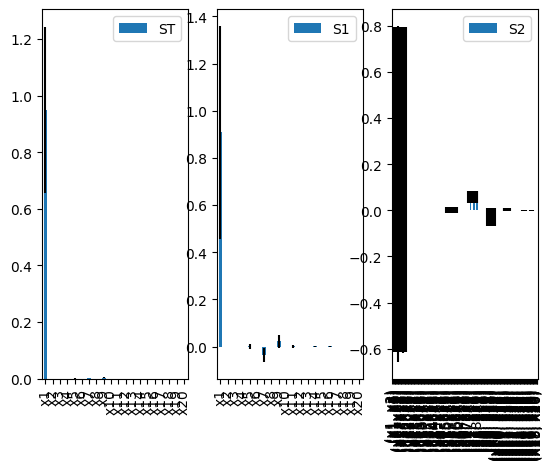

In [ ]:
# Read samples Y
Y = np.array(result_X)


# Perform analysis (auto display)
Si = sobol.analyze(inputs, Y, print_to_console=True)


Si.plot()
plot.show()

# 6th cycle

## definition of sobol' SA function


In [ ]:
#3. sample generating of input parameters
s = 32
var = 20
scale = s * (2 * var + 2) #scale = s * (2 * var + 2)

# Define the model inputs
inputs = {
  'num_vars': var,
  'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
  'bounds': [[X0_cell, SD_X0_cell],
    [X0_algae, SD_X0_algae],
    [umax_cell, SD_umax_cell],
    [umax_algae, SD_umax_algae],
    [Cglc0_cell, SD_Cglc0_cell],
    [Cglc0_algae, SD_Cglc0_algae],
    [Clac0_cell,SD_Clac0_cell],
    [Clac0_algae,SD_Clac0_algae],
    [Cgln0_cell, SD_Cgln0_cell],
    [Cgln0_algae, SD_Cgln0_algae],
    [Camm0_cell, SD_Camm0_cell],
    [Camm0_algae, SD_Camm0_algae],
    [qglc_cell, SD_qglc_cell],
    [qlac_cell, SD_qlac_cell],
    [qlac_algae, SD_qlac_algae],
    [qgln_cell, SD_qgln_cell],
    [qgln_algae, SD_qgln_algae],
    [qamm_cell, SD_qamm_cell],
    [qamm_algae, SD_qamm_algae],
    [kglc, SD_kglc]],
  'dists': ['norm'] * var
}


param_values = saltelli.sample(inputs, scale)

<ipython-input-28-879c203ede2f>:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(inputs, scale)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1344) is equal to `2^n`.
        
  warnings.warn(msg)


## model definition

In [ ]:
#4. running model and generating output sample
def CCC_system():
  #output
  list_X = []
  list_Cglc_cell_i = []
  list_Clac_cell_i = []
  list_Cgln_cell_i = []
  list_Camm_cell_i = []
  list_Cglc_algae_i = []
  list_Clac_algae_i = []
  list_Cgln_algae_i = []
  list_Camm_algae_i = []

  for q in range(scale):

    #Input
    time  = 0
    cycle = 0
    k     = 1 #medium volume ratio
    #Input with variation
    input_X0_cell =param_values[q][0]
    input_X0_algae = param_values[q][1]
    input_umax_cell = param_values[q][2]
    input_umax_algae = param_values[q][3]
    Cglc_cell = param_values[q][4]
    Cglc_algae = param_values[q][5]
    Clac_cell = param_values[q][6]
    Clac_algae = param_values[q][7]
    Cgln_cell = param_values[q][8]
    Cgln_algae = param_values[q][9]
    Camm_cell = param_values[q][10]
    Camm_algae = param_values[q][11]
    input_qglc_cell = param_values[q][12]
    input_qlac_cell = param_values[q][13]
    input_qlac_algae = param_values[q][14]
    input_qgln_cell = param_values[q][15]
    input_qgln_algae = param_values[q][16]
    input_qamm_cell = param_values[q][17]
    input_qamm_algae = param_values[q][18]
    input_kglc = param_values[q][19]
    #Output
    #lists
    #time profile
    list_X_i = []
    list_X_algae_i = []
    list_time_i = []

    #medium concentration in algal culture after acid hydrolysis process
    list_Cglc_hydrolysis = []
    list_Clac_hydrolysis = []
    list_Cgln_hydrolysis = []
    list_Camm_hydrolysis = []
    #medium concentration in animal cells culture before medium exchange process
    list_Cglc_exchange = []
    list_Clac_exchange = []
    list_Cgln_exchange = []
    list_Camm_exchange = []

    #増殖速度式
    #動物細胞
    f = lambda X_cell,t=0 : u_cell*X_cell
    #藻類
    g = lambda X_algae,t=0 : u_algae*X_algae
    #グルタミンの分解速度式
    gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
    gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

    # 結果を返すための配列の宣言
    #細胞濃度
    #動物細胞
    ls_X_cell = np.empty(n)
    ls_X_cell[0] = input_X0_cell
    #藻類
    ls_X_algae = np.empty(n)
    ls_X_algae[0] = input_X0_algae
    #グルタミン濃度
    #動物細胞
    ls_Cgln_cell = np.empty(n)
    ls_Cgln_cell[0] = Cgln_cell
    #藻類
    ls_Cgln_algae = np.empty(n)
    ls_Cgln_algae[0] = Cgln_algae

    #リストに初期細胞密度を格納しておく
    list_X_i.append(input_X0_cell)
    list_X_algae_i.append(input_X0_algae)

    for j in range(0,n-1):

      #1. 動物細胞培養
      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae)

      #1. 動物細胞および藻類増殖時
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h


        #2.2 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #time profileリストにパラメータを格納する
        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #2. 藻類のみ増殖時
      elif get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #2.2 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #3. 動物細胞のみ増殖時
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10:
        #3.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #3.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_X_i.append(ls_X_cell[j+1])
        list_time_i.append(time)
        time += h

      else:
        #4.1 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        #4.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)
        time += h


    #酸加水分解操作，培地交換操作

    #酸加水分解操作(藻類栄養素抽出)
    #酸加水分解操作後の培地濃度
    Cglc_algae_after = Cglc_algae + 5/100*input_kglc*list_X_algae_i[-1]
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae
    #酸加水分解操作後の培地濃度をリストに格納
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)
    #培地交換前の培地濃度をリストに格納
    list_Cglc_exchange.append(Cglc_cell)
    list_Clac_exchange.append(Clac_cell)
    list_Cgln_exchange.append(Cgln_cell)
    list_Camm_exchange.append(Camm_cell)

    #培地交換操作
    #培地濃度
    #藻類
    Cglc_algae = list_Cglc_exchange[cycle]
    Clac_algae = list_Clac_exchange[cycle]
    Cgln_algae = list_Cgln_exchange[cycle]
    Camm_algae = list_Camm_exchange[cycle]

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]

    #output
    list_X.append(list_X_i[-1])
    list_Cglc_cell_i.append(Cglc_cell)
    list_Clac_cell_i.append(Clac_cell)
    list_Cgln_cell_i.append(Cgln_cell)
    list_Camm_cell_i.append(Camm_cell)
    list_Cglc_algae_i.append(Cglc_algae)
    list_Clac_algae_i.append(Clac_algae)
    list_Cgln_algae_i.append(Cgln_algae)
    list_Camm_algae_i.append(Camm_algae)

  #output
  my_list = [statistics.mean(list_Cglc_cell_i),statistics.mean(list_Clac_cell_i),statistics.mean(list_Cgln_cell_i),statistics.mean(list_Camm_cell_i),
              statistics.mean(list_Cglc_algae_i),statistics.mean(list_Clac_algae_i),statistics.mean(list_Cgln_algae_i),statistics.mean(list_Camm_algae_i),
              statistics.stdev(list_Cglc_cell_i),statistics.stdev(list_Clac_cell_i),statistics.stdev(list_Cgln_cell_i),statistics.stdev(list_Camm_cell_i),
              statistics.stdev(list_Cglc_algae_i),statistics.stdev(list_Clac_algae_i),statistics.stdev(list_Cgln_algae_i),statistics.stdev(list_Camm_algae_i)]

  return list_X,my_list

## model output

In [ ]:
result_X,result_medium = CCC_system()

#培地濃度
#next input value
Cglc0_cell = result_medium[0]
Clac0_cell = result_medium[1]
Cgln0_cell = result_medium[2]
Camm0_cell = result_medium[3]
Cglc0_algae = result_medium[4]
Clac0_algae = result_medium[5]
Cgln0_algae = result_medium[6]
Camm0_algae = result_medium[7]

#next input standard deviation
SD_Cglc0_cell = result_medium[8]
SD_Clac0_cell = result_medium[9]
SD_Cgln0_cell = result_medium[10]
SD_Camm0_cell = result_medium[11]
SD_Cglc0_algae = result_medium[12]
SD_Clac0_algae = result_medium[13]
SD_Cgln0_algae = result_medium[14]
SD_Camm0_algae = result_medium[15]

## sensitivity analysis (ranking system)

               ST       ST_conf
x1   9.571299e-01  3.232157e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   5.850327e-04  4.556681e-04
x6   0.000000e+00  0.000000e+00
x7   2.602762e-03  1.965471e-03
x8   0.000000e+00  0.000000e+00
x9   1.371974e-03  8.008979e-04
x10  0.000000e+00  0.000000e+00
x11  5.499331e-06  4.852432e-06
x12  0.000000e+00  0.000000e+00
x13  6.896341e-08  5.932335e-08
x14  2.159332e-06  1.482098e-06
x15  0.000000e+00  0.000000e+00
x16  5.895909e-06  3.774034e-06
x17  0.000000e+00  0.000000e+00
x18  3.259086e-08  2.101927e-08
x19  0.000000e+00  0.000000e+00
x20  0.000000e+00  0.000000e+00
           S1   S1_conf
x1   0.913998  0.513936
x2   0.000000  0.000000
x3   0.000000  0.000000
x4   0.000000  0.000000
x5   0.000175  0.013204
x6   0.000000  0.000000
x7  -0.037576  0.034264
x8   0.000000  0.000000
x9   0.015812  0.024011
x10  0.000000  0.000000
x11  0.000015  0.000950
x12  0.000000  0.000000
x13 -0.000023  0

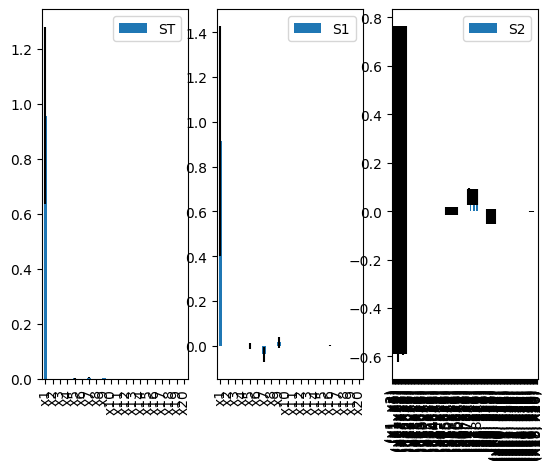

In [ ]:
# Read samples Y
Y = np.array(result_X)


# Perform analysis (auto display)
Si = sobol.analyze(inputs, Y, print_to_console=True)


Si.plot()
plot.show()

# 7th cycle

## definition of sobol' SA function


In [ ]:
#3. sample generating of input parameters
s = 32
var = 20
scale = s * (2 * var + 2) #scale = s * (2 * var + 2)

# Define the model inputs
inputs = {
  'num_vars': var,
  'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
  'bounds': [[X0_cell, SD_X0_cell],
    [X0_algae, SD_X0_algae],
    [umax_cell, SD_umax_cell],
    [umax_algae, SD_umax_algae],
    [Cglc0_cell, SD_Cglc0_cell],
    [Cglc0_algae, SD_Cglc0_algae],
    [Clac0_cell,SD_Clac0_cell],
    [Clac0_algae,SD_Clac0_algae],
    [Cgln0_cell, SD_Cgln0_cell],
    [Cgln0_algae, SD_Cgln0_algae],
    [Camm0_cell, SD_Camm0_cell],
    [Camm0_algae, SD_Camm0_algae],
    [qglc_cell, SD_qglc_cell],
    [qlac_cell, SD_qlac_cell],
    [qlac_algae, SD_qlac_algae],
    [qgln_cell, SD_qgln_cell],
    [qgln_algae, SD_qgln_algae],
    [qamm_cell, SD_qamm_cell],
    [qamm_algae, SD_qamm_algae],
    [kglc, SD_kglc]],
  'dists': ['norm'] * var
}


param_values = saltelli.sample(inputs, scale)

<ipython-input-32-879c203ede2f>:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(inputs, scale)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1344) is equal to `2^n`.
        
  warnings.warn(msg)


## model definition

In [ ]:
#4. running model and generating output sample
def CCC_system():
  #output
  list_X = []
  list_Cglc_cell_i = []
  list_Clac_cell_i = []
  list_Cgln_cell_i = []
  list_Camm_cell_i = []
  list_Cglc_algae_i = []
  list_Clac_algae_i = []
  list_Cgln_algae_i = []
  list_Camm_algae_i = []

  for q in range(scale):

    #Input
    time  = 0
    cycle = 0
    k     = 1 #medium volume ratio
    #Input with variation
    input_X0_cell =param_values[q][0]
    input_X0_algae = param_values[q][1]
    input_umax_cell = param_values[q][2]
    input_umax_algae = param_values[q][3]
    Cglc_cell = param_values[q][4]
    Cglc_algae = param_values[q][5]
    Clac_cell = param_values[q][6]
    Clac_algae = param_values[q][7]
    Cgln_cell = param_values[q][8]
    Cgln_algae = param_values[q][9]
    Camm_cell = param_values[q][10]
    Camm_algae = param_values[q][11]
    input_qglc_cell = param_values[q][12]
    input_qlac_cell = param_values[q][13]
    input_qlac_algae = param_values[q][14]
    input_qgln_cell = param_values[q][15]
    input_qgln_algae = param_values[q][16]
    input_qamm_cell = param_values[q][17]
    input_qamm_algae = param_values[q][18]
    input_kglc = param_values[q][19]
    #Output
    #lists
    #time profile
    list_X_i = []
    list_X_algae_i = []
    list_time_i = []

    #medium concentration in algal culture after acid hydrolysis process
    list_Cglc_hydrolysis = []
    list_Clac_hydrolysis = []
    list_Cgln_hydrolysis = []
    list_Camm_hydrolysis = []
    #medium concentration in animal cells culture before medium exchange process
    list_Cglc_exchange = []
    list_Clac_exchange = []
    list_Cgln_exchange = []
    list_Camm_exchange = []

    #増殖速度式
    #動物細胞
    f = lambda X_cell,t=0 : u_cell*X_cell
    #藻類
    g = lambda X_algae,t=0 : u_algae*X_algae
    #グルタミンの分解速度式
    gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
    gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

    # 結果を返すための配列の宣言
    #細胞濃度
    #動物細胞
    ls_X_cell = np.empty(n)
    ls_X_cell[0] = input_X0_cell
    #藻類
    ls_X_algae = np.empty(n)
    ls_X_algae[0] = input_X0_algae
    #グルタミン濃度
    #動物細胞
    ls_Cgln_cell = np.empty(n)
    ls_Cgln_cell[0] = Cgln_cell
    #藻類
    ls_Cgln_algae = np.empty(n)
    ls_Cgln_algae[0] = Cgln_algae

    #リストに初期細胞密度を格納しておく
    list_X_i.append(input_X0_cell)
    list_X_algae_i.append(input_X0_algae)

    for j in range(0,n-1):

      #1. 動物細胞培養
      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae)

      #1. 動物細胞および藻類増殖時
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h


        #2.2 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #time profileリストにパラメータを格納する
        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #2. 藻類のみ増殖時
      elif get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #2.2 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #3. 動物細胞のみ増殖時
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10:
        #3.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #3.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_X_i.append(ls_X_cell[j+1])
        list_time_i.append(time)
        time += h

      else:
        #4.1 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        #4.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)
        time += h


    #酸加水分解操作，培地交換操作

    #酸加水分解操作(藻類栄養素抽出)
    #酸加水分解操作後の培地濃度
    Cglc_algae_after = Cglc_algae + 5/100*input_kglc*list_X_algae_i[-1]
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae
    #酸加水分解操作後の培地濃度をリストに格納
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)
    #培地交換前の培地濃度をリストに格納
    list_Cglc_exchange.append(Cglc_cell)
    list_Clac_exchange.append(Clac_cell)
    list_Cgln_exchange.append(Cgln_cell)
    list_Camm_exchange.append(Camm_cell)

    #培地交換操作
    #培地濃度
    #藻類
    Cglc_algae = list_Cglc_exchange[cycle]
    Clac_algae = list_Clac_exchange[cycle]
    Cgln_algae = list_Cgln_exchange[cycle]
    Camm_algae = list_Camm_exchange[cycle]

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]

    #output
    list_X.append(list_X_i[-1])
    list_Cglc_cell_i.append(Cglc_cell)
    list_Clac_cell_i.append(Clac_cell)
    list_Cgln_cell_i.append(Cgln_cell)
    list_Camm_cell_i.append(Camm_cell)
    list_Cglc_algae_i.append(Cglc_algae)
    list_Clac_algae_i.append(Clac_algae)
    list_Cgln_algae_i.append(Cgln_algae)
    list_Camm_algae_i.append(Camm_algae)

  #output
  my_list = [statistics.mean(list_Cglc_cell_i),statistics.mean(list_Clac_cell_i),statistics.mean(list_Cgln_cell_i),statistics.mean(list_Camm_cell_i),
              statistics.mean(list_Cglc_algae_i),statistics.mean(list_Clac_algae_i),statistics.mean(list_Cgln_algae_i),statistics.mean(list_Camm_algae_i),
              statistics.stdev(list_Cglc_cell_i),statistics.stdev(list_Clac_cell_i),statistics.stdev(list_Cgln_cell_i),statistics.stdev(list_Camm_cell_i),
              statistics.stdev(list_Cglc_algae_i),statistics.stdev(list_Clac_algae_i),statistics.stdev(list_Cgln_algae_i),statistics.stdev(list_Camm_algae_i)]

  return list_X,my_list

## model output

In [ ]:
result_X,result_medium = CCC_system()

#培地濃度
#next input value
Cglc0_cell = result_medium[0]
Clac0_cell = result_medium[1]
Cgln0_cell = result_medium[2]
Camm0_cell = result_medium[3]
Cglc0_algae = result_medium[4]
Clac0_algae = result_medium[5]
Cgln0_algae = result_medium[6]
Camm0_algae = result_medium[7]

#next input standard deviation
SD_Cglc0_cell = result_medium[8]
SD_Clac0_cell = result_medium[9]
SD_Cgln0_cell = result_medium[10]
SD_Camm0_cell = result_medium[11]
SD_Cglc0_algae = result_medium[12]
SD_Clac0_algae = result_medium[13]
SD_Cgln0_algae = result_medium[14]
SD_Camm0_algae = result_medium[15]

## sensitivity analysis (ranking system)

               ST       ST_conf
x1   9.044412e-01  2.903052e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   6.628490e-04  5.048379e-04
x6   0.000000e+00  0.000000e+00
x7   2.513004e-03  1.707493e-03
x8   0.000000e+00  0.000000e+00
x9   2.752482e-02  1.815880e-02
x10  0.000000e+00  0.000000e+00
x11  6.539940e-06  4.847120e-06
x12  0.000000e+00  0.000000e+00
x13  2.625303e-07  1.981021e-07
x14  1.941051e-06  1.580910e-06
x15  0.000000e+00  0.000000e+00
x16  1.179259e-04  8.583441e-05
x17  0.000000e+00  0.000000e+00
x18  2.044183e-08  1.264868e-08
x19  0.000000e+00  0.000000e+00
x20  0.000000e+00  0.000000e+00
           S1   S1_conf
x1   0.869695  0.532185
x2   0.000000  0.000000
x3   0.000000  0.000000
x4   0.000000  0.000000
x5   0.000749  0.014010
x6   0.000000  0.000000
x7  -0.039052  0.033189
x8   0.000000  0.000000
x9   0.081866  0.105129
x10  0.000000  0.000000
x11  0.000068  0.000989
x12  0.000000  0.000000
x13 -0.000065  0

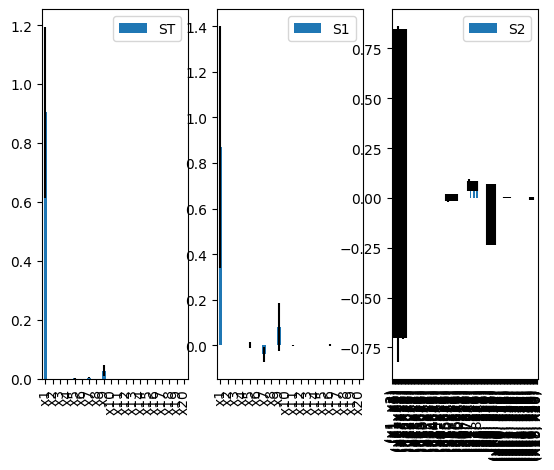

In [ ]:
# Read samples Y
Y = np.array(result_X)


# Perform analysis (auto display)
Si = sobol.analyze(inputs, Y, print_to_console=True)


Si.plot()
plot.show()

# 8th cycle

## definition of sobol' SA function


In [ ]:
#3. sample generating of input parameters
s = 32
var = 20
scale = s * (2 * var + 2) #scale = s * (2 * var + 2)

# Define the model inputs
inputs = {
  'num_vars': var,
  'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
  'bounds': [[X0_cell, SD_X0_cell],
    [X0_algae, SD_X0_algae],
    [umax_cell, SD_umax_cell],
    [umax_algae, SD_umax_algae],
    [Cglc0_cell, SD_Cglc0_cell],
    [Cglc0_algae, SD_Cglc0_algae],
    [Clac0_cell,SD_Clac0_cell],
    [Clac0_algae,SD_Clac0_algae],
    [Cgln0_cell, SD_Cgln0_cell],
    [Cgln0_algae, SD_Cgln0_algae],
    [Camm0_cell, SD_Camm0_cell],
    [Camm0_algae, SD_Camm0_algae],
    [qglc_cell, SD_qglc_cell],
    [qlac_cell, SD_qlac_cell],
    [qlac_algae, SD_qlac_algae],
    [qgln_cell, SD_qgln_cell],
    [qgln_algae, SD_qgln_algae],
    [qamm_cell, SD_qamm_cell],
    [qamm_algae, SD_qamm_algae],
    [kglc, SD_kglc]],
  'dists': ['norm'] * var
}


param_values = saltelli.sample(inputs, scale)

<ipython-input-36-879c203ede2f>:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(inputs, scale)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1344) is equal to `2^n`.
        
  warnings.warn(msg)


## model definition

In [ ]:
#4. running model and generating output sample
def CCC_system():
  #output
  list_X = []
  list_Cglc_cell_i = []
  list_Clac_cell_i = []
  list_Cgln_cell_i = []
  list_Camm_cell_i = []
  list_Cglc_algae_i = []
  list_Clac_algae_i = []
  list_Cgln_algae_i = []
  list_Camm_algae_i = []

  for q in range(scale):

    #Input
    time  = 0
    cycle = 0
    k     = 1 #medium volume ratio
    #Input with variation
    input_X0_cell =param_values[q][0]
    input_X0_algae = param_values[q][1]
    input_umax_cell = param_values[q][2]
    input_umax_algae = param_values[q][3]
    Cglc_cell = param_values[q][4]
    Cglc_algae = param_values[q][5]
    Clac_cell = param_values[q][6]
    Clac_algae = param_values[q][7]
    Cgln_cell = param_values[q][8]
    Cgln_algae = param_values[q][9]
    Camm_cell = param_values[q][10]
    Camm_algae = param_values[q][11]
    input_qglc_cell = param_values[q][12]
    input_qlac_cell = param_values[q][13]
    input_qlac_algae = param_values[q][14]
    input_qgln_cell = param_values[q][15]
    input_qgln_algae = param_values[q][16]
    input_qamm_cell = param_values[q][17]
    input_qamm_algae = param_values[q][18]
    input_kglc = param_values[q][19]
    #Output
    #lists
    #time profile
    list_X_i = []
    list_X_algae_i = []
    list_time_i = []

    #medium concentration in algal culture after acid hydrolysis process
    list_Cglc_hydrolysis = []
    list_Clac_hydrolysis = []
    list_Cgln_hydrolysis = []
    list_Camm_hydrolysis = []
    #medium concentration in animal cells culture before medium exchange process
    list_Cglc_exchange = []
    list_Clac_exchange = []
    list_Cgln_exchange = []
    list_Camm_exchange = []

    #増殖速度式
    #動物細胞
    f = lambda X_cell,t=0 : u_cell*X_cell
    #藻類
    g = lambda X_algae,t=0 : u_algae*X_algae
    #グルタミンの分解速度式
    gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
    gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

    # 結果を返すための配列の宣言
    #細胞濃度
    #動物細胞
    ls_X_cell = np.empty(n)
    ls_X_cell[0] = input_X0_cell
    #藻類
    ls_X_algae = np.empty(n)
    ls_X_algae[0] = input_X0_algae
    #グルタミン濃度
    #動物細胞
    ls_Cgln_cell = np.empty(n)
    ls_Cgln_cell[0] = Cgln_cell
    #藻類
    ls_Cgln_algae = np.empty(n)
    ls_Cgln_algae[0] = Cgln_algae

    #リストに初期細胞密度を格納しておく
    list_X_i.append(input_X0_cell)
    list_X_algae_i.append(input_X0_algae)

    for j in range(0,n-1):

      #1. 動物細胞培養
      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae)

      #1. 動物細胞および藻類増殖時
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h


        #2.2 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #time profileリストにパラメータを格納する
        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #2. 藻類のみ増殖時
      elif get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #2.2 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #3. 動物細胞のみ増殖時
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10:
        #3.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #3.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_X_i.append(ls_X_cell[j+1])
        list_time_i.append(time)
        time += h

      else:
        #4.1 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        #4.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)
        time += h


    #酸加水分解操作，培地交換操作

    #酸加水分解操作(藻類栄養素抽出)
    #酸加水分解操作後の培地濃度
    Cglc_algae_after = Cglc_algae + 5/100*input_kglc*list_X_algae_i[-1]
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae
    #酸加水分解操作後の培地濃度をリストに格納
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)
    #培地交換前の培地濃度をリストに格納
    list_Cglc_exchange.append(Cglc_cell)
    list_Clac_exchange.append(Clac_cell)
    list_Cgln_exchange.append(Cgln_cell)
    list_Camm_exchange.append(Camm_cell)

    #培地交換操作
    #培地濃度
    #藻類
    Cglc_algae = list_Cglc_exchange[cycle]
    Clac_algae = list_Clac_exchange[cycle]
    Cgln_algae = list_Cgln_exchange[cycle]
    Camm_algae = list_Camm_exchange[cycle]

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]

    #output
    list_X.append(list_X_i[-1])
    list_Cglc_cell_i.append(Cglc_cell)
    list_Clac_cell_i.append(Clac_cell)
    list_Cgln_cell_i.append(Cgln_cell)
    list_Camm_cell_i.append(Camm_cell)
    list_Cglc_algae_i.append(Cglc_algae)
    list_Clac_algae_i.append(Clac_algae)
    list_Cgln_algae_i.append(Cgln_algae)
    list_Camm_algae_i.append(Camm_algae)

  #output
  my_list = [statistics.mean(list_Cglc_cell_i),statistics.mean(list_Clac_cell_i),statistics.mean(list_Cgln_cell_i),statistics.mean(list_Camm_cell_i),
              statistics.mean(list_Cglc_algae_i),statistics.mean(list_Clac_algae_i),statistics.mean(list_Cgln_algae_i),statistics.mean(list_Camm_algae_i),
              statistics.stdev(list_Cglc_cell_i),statistics.stdev(list_Clac_cell_i),statistics.stdev(list_Cgln_cell_i),statistics.stdev(list_Camm_cell_i),
              statistics.stdev(list_Cglc_algae_i),statistics.stdev(list_Clac_algae_i),statistics.stdev(list_Cgln_algae_i),statistics.stdev(list_Camm_algae_i)]

  return list_X,my_list

## model output

In [ ]:
result_X,result_medium = CCC_system()

#培地濃度
#next input value
Cglc0_cell = result_medium[0]
Clac0_cell = result_medium[1]
Cgln0_cell = result_medium[2]
Camm0_cell = result_medium[3]
Cglc0_algae = result_medium[4]
Clac0_algae = result_medium[5]
Cgln0_algae = result_medium[6]
Camm0_algae = result_medium[7]

#next input standard deviation
SD_Cglc0_cell = result_medium[8]
SD_Clac0_cell = result_medium[9]
SD_Cgln0_cell = result_medium[10]
SD_Camm0_cell = result_medium[11]
SD_Cglc0_algae = result_medium[12]
SD_Clac0_algae = result_medium[13]
SD_Cgln0_algae = result_medium[14]
SD_Camm0_algae = result_medium[15]

## sensitivity analysis (ranking system)

               ST       ST_conf
x1   9.385878e-01  2.949975e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   7.403278e-04  6.061986e-04
x6   0.000000e+00  0.000000e+00
x7   2.454533e-03  1.730036e-03
x8   0.000000e+00  0.000000e+00
x9   8.717878e-03  4.710505e-03
x10  0.000000e+00  0.000000e+00
x11  4.450600e-08  3.254507e-08
x12  0.000000e+00  0.000000e+00
x13  6.712690e-08  4.878870e-08
x14  1.337506e-06  1.107882e-06
x15  0.000000e+00  0.000000e+00
x16  3.120928e-05  1.895607e-05
x17  0.000000e+00  0.000000e+00
x18  1.883747e-08  1.097155e-08
x19  0.000000e+00  0.000000e+00
x20  0.000000e+00  0.000000e+00
           S1   S1_conf
x1   0.899612  0.456046
x2   0.000000  0.000000
x3   0.000000  0.000000
x4   0.000000  0.000000
x5   0.000232  0.014843
x6   0.000000  0.000000
x7  -0.037613  0.031088
x8   0.000000  0.000000
x9   0.042085  0.053701
x10  0.000000  0.000000
x11  0.000003  0.000094
x12  0.000000  0.000000
x13 -0.000024  0

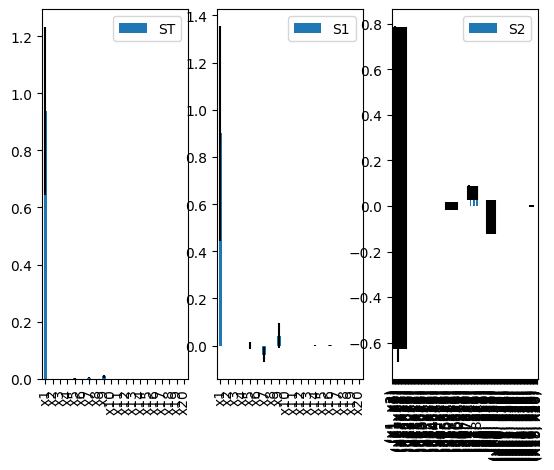

In [ ]:
# Read samples Y
Y = np.array(result_X)


# Perform analysis (auto display)
Si = sobol.analyze(inputs, Y, print_to_console=True)


Si.plot()
plot.show()

# 9th cycle

## definition of sobol' SA function


In [ ]:
#3. sample generating of input parameters
s = 32
var = 20
scale = s * (2 * var + 2) #scale = s * (2 * var + 2)

# Define the model inputs
inputs = {
  'num_vars': var,
  'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
  'bounds': [[X0_cell, SD_X0_cell],
    [X0_algae, SD_X0_algae],
    [umax_cell, SD_umax_cell],
    [umax_algae, SD_umax_algae],
    [Cglc0_cell, SD_Cglc0_cell],
    [Cglc0_algae, SD_Cglc0_algae],
    [Clac0_cell,SD_Clac0_cell],
    [Clac0_algae,SD_Clac0_algae],
    [Cgln0_cell, SD_Cgln0_cell],
    [Cgln0_algae, SD_Cgln0_algae],
    [Camm0_cell, SD_Camm0_cell],
    [Camm0_algae, SD_Camm0_algae],
    [qglc_cell, SD_qglc_cell],
    [qlac_cell, SD_qlac_cell],
    [qlac_algae, SD_qlac_algae],
    [qgln_cell, SD_qgln_cell],
    [qgln_algae, SD_qgln_algae],
    [qamm_cell, SD_qamm_cell],
    [qamm_algae, SD_qamm_algae],
    [kglc, SD_kglc]],
  'dists': ['norm'] * var
}


param_values = saltelli.sample(inputs, scale)

<ipython-input-40-879c203ede2f>:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(inputs, scale)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1344) is equal to `2^n`.
        
  warnings.warn(msg)


## model definition

In [ ]:
#4. running model and generating output sample
def CCC_system():
  #output
  list_X = []
  list_Cglc_cell_i = []
  list_Clac_cell_i = []
  list_Cgln_cell_i = []
  list_Camm_cell_i = []
  list_Cglc_algae_i = []
  list_Clac_algae_i = []
  list_Cgln_algae_i = []
  list_Camm_algae_i = []

  for q in range(scale):

    #Input
    time  = 0
    cycle = 0
    k     = 1 #medium volume ratio
    #Input with variation
    input_X0_cell =param_values[q][0]
    input_X0_algae = param_values[q][1]
    input_umax_cell = param_values[q][2]
    input_umax_algae = param_values[q][3]
    Cglc_cell = param_values[q][4]
    Cglc_algae = param_values[q][5]
    Clac_cell = param_values[q][6]
    Clac_algae = param_values[q][7]
    Cgln_cell = param_values[q][8]
    Cgln_algae = param_values[q][9]
    Camm_cell = param_values[q][10]
    Camm_algae = param_values[q][11]
    input_qglc_cell = param_values[q][12]
    input_qlac_cell = param_values[q][13]
    input_qlac_algae = param_values[q][14]
    input_qgln_cell = param_values[q][15]
    input_qgln_algae = param_values[q][16]
    input_qamm_cell = param_values[q][17]
    input_qamm_algae = param_values[q][18]
    input_kglc = param_values[q][19]
    #Output
    #lists
    #time profile
    list_X_i = []
    list_X_algae_i = []
    list_time_i = []

    #medium concentration in algal culture after acid hydrolysis process
    list_Cglc_hydrolysis = []
    list_Clac_hydrolysis = []
    list_Cgln_hydrolysis = []
    list_Camm_hydrolysis = []
    #medium concentration in animal cells culture before medium exchange process
    list_Cglc_exchange = []
    list_Clac_exchange = []
    list_Cgln_exchange = []
    list_Camm_exchange = []

    #増殖速度式
    #動物細胞
    f = lambda X_cell,t=0 : u_cell*X_cell
    #藻類
    g = lambda X_algae,t=0 : u_algae*X_algae
    #グルタミンの分解速度式
    gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
    gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

    # 結果を返すための配列の宣言
    #細胞濃度
    #動物細胞
    ls_X_cell = np.empty(n)
    ls_X_cell[0] = input_X0_cell
    #藻類
    ls_X_algae = np.empty(n)
    ls_X_algae[0] = input_X0_algae
    #グルタミン濃度
    #動物細胞
    ls_Cgln_cell = np.empty(n)
    ls_Cgln_cell[0] = Cgln_cell
    #藻類
    ls_Cgln_algae = np.empty(n)
    ls_Cgln_algae[0] = Cgln_algae

    #リストに初期細胞密度を格納しておく
    list_X_i.append(input_X0_cell)
    list_X_algae_i.append(input_X0_algae)

    for j in range(0,n-1):

      #1. 動物細胞培養
      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae)

      #1. 動物細胞および藻類増殖時
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h


        #2.2 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #time profileリストにパラメータを格納する
        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #2. 藻類のみ増殖時
      elif get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #2.2 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #3. 動物細胞のみ増殖時
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10:
        #3.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #3.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_X_i.append(ls_X_cell[j+1])
        list_time_i.append(time)
        time += h

      else:
        #4.1 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        #4.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)
        time += h


    #酸加水分解操作，培地交換操作

    #酸加水分解操作(藻類栄養素抽出)
    #酸加水分解操作後の培地濃度
    Cglc_algae_after = Cglc_algae + 5/100*input_kglc*list_X_algae_i[-1]
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae
    #酸加水分解操作後の培地濃度をリストに格納
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)
    #培地交換前の培地濃度をリストに格納
    list_Cglc_exchange.append(Cglc_cell)
    list_Clac_exchange.append(Clac_cell)
    list_Cgln_exchange.append(Cgln_cell)
    list_Camm_exchange.append(Camm_cell)

    #培地交換操作
    #培地濃度
    #藻類
    Cglc_algae = list_Cglc_exchange[cycle]
    Clac_algae = list_Clac_exchange[cycle]
    Cgln_algae = list_Cgln_exchange[cycle]
    Camm_algae = list_Camm_exchange[cycle]

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]

    #output
    list_X.append(list_X_i[-1])
    list_Cglc_cell_i.append(Cglc_cell)
    list_Clac_cell_i.append(Clac_cell)
    list_Cgln_cell_i.append(Cgln_cell)
    list_Camm_cell_i.append(Camm_cell)
    list_Cglc_algae_i.append(Cglc_algae)
    list_Clac_algae_i.append(Clac_algae)
    list_Cgln_algae_i.append(Cgln_algae)
    list_Camm_algae_i.append(Camm_algae)

  #output
  my_list = [statistics.mean(list_Cglc_cell_i),statistics.mean(list_Clac_cell_i),statistics.mean(list_Cgln_cell_i),statistics.mean(list_Camm_cell_i),
              statistics.mean(list_Cglc_algae_i),statistics.mean(list_Clac_algae_i),statistics.mean(list_Cgln_algae_i),statistics.mean(list_Camm_algae_i),
              statistics.stdev(list_Cglc_cell_i),statistics.stdev(list_Clac_cell_i),statistics.stdev(list_Cgln_cell_i),statistics.stdev(list_Camm_cell_i),
              statistics.stdev(list_Cglc_algae_i),statistics.stdev(list_Clac_algae_i),statistics.stdev(list_Cgln_algae_i),statistics.stdev(list_Camm_algae_i)]

  return list_X,my_list

## model output

In [ ]:
result_X,result_medium = CCC_system()

#培地濃度
#next input value
Cglc0_cell = result_medium[0]
Clac0_cell = result_medium[1]
Cgln0_cell = result_medium[2]
Camm0_cell = result_medium[3]
Cglc0_algae = result_medium[4]
Clac0_algae = result_medium[5]
Cgln0_algae = result_medium[6]
Camm0_algae = result_medium[7]

#next input standard deviation
SD_Cglc0_cell = result_medium[8]
SD_Clac0_cell = result_medium[9]
SD_Cgln0_cell = result_medium[10]
SD_Camm0_cell = result_medium[11]
SD_Cglc0_algae = result_medium[12]
SD_Clac0_algae = result_medium[13]
SD_Cgln0_algae = result_medium[14]
SD_Camm0_algae = result_medium[15]

## sensitivity analysis (ranking system)

               ST       ST_conf
x1   6.068136e-01  2.737814e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   3.754548e-04  4.156762e-04
x6   0.000000e+00  0.000000e+00
x7   1.258381e-03  1.452933e-03
x8   0.000000e+00  0.000000e+00
x9   3.096320e-01  1.699566e-01
x10  0.000000e+00  0.000000e+00
x11  1.827836e-05  1.362593e-05
x12  0.000000e+00  0.000000e+00
x13  6.066615e-08  4.139822e-08
x14  4.169805e-07  4.610242e-07
x15  0.000000e+00  0.000000e+00
x16  7.350556e-04  5.251489e-04
x17  0.000000e+00  0.000000e+00
x18  2.226405e-09  1.570102e-09
x19  0.000000e+00  0.000000e+00
x20  0.000000e+00  0.000000e+00
           S1   S1_conf
x1   0.596739  0.396499
x2   0.000000  0.000000
x3   0.000000  0.000000
x4   0.000000  0.000000
x5   0.002902  0.013365
x6   0.000000  0.000000
x7  -0.029462  0.030675
x8   0.000000  0.000000
x9   0.466901  0.348730
x10  0.000000  0.000000
x11  0.000226  0.001998
x12  0.000000  0.000000
x13 -0.000025  0

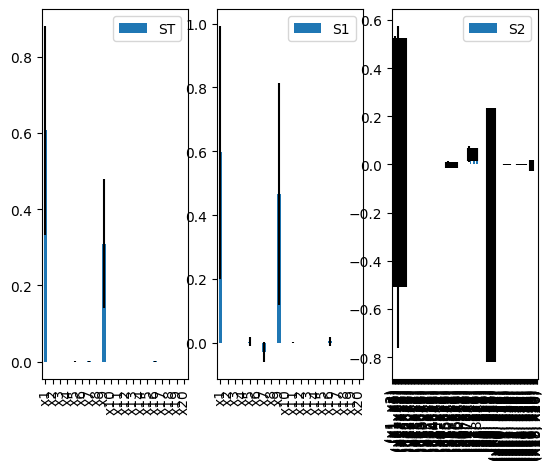

In [ ]:
# Read samples Y
Y = np.array(result_X)


# Perform analysis (auto display)
Si = sobol.analyze(inputs, Y, print_to_console=True)


Si.plot()
plot.show()

# 10th cycle

## definition of sobol' SA function


In [ ]:
#3. sample generating of input parameters
s = 32
var = 20
scale = s * (2 * var + 2) #scale = s * (2 * var + 2)

# Define the model inputs
inputs = {
  'num_vars': var,
  'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20'],
  'bounds': [[X0_cell, SD_X0_cell],
    [X0_algae, SD_X0_algae],
    [umax_cell, SD_umax_cell],
    [umax_algae, SD_umax_algae],
    [Cglc0_cell, SD_Cglc0_cell],
    [Cglc0_algae, SD_Cglc0_algae],
    [Clac0_cell,SD_Clac0_cell],
    [Clac0_algae,SD_Clac0_algae],
    [Cgln0_cell, SD_Cgln0_cell],
    [Cgln0_algae, SD_Cgln0_algae],
    [Camm0_cell, SD_Camm0_cell],
    [Camm0_algae, SD_Camm0_algae],
    [qglc_cell, SD_qglc_cell],
    [qlac_cell, SD_qlac_cell],
    [qlac_algae, SD_qlac_algae],
    [qgln_cell, SD_qgln_cell],
    [qgln_algae, SD_qgln_algae],
    [qamm_cell, SD_qamm_cell],
    [qamm_algae, SD_qamm_algae],
    [kglc, SD_kglc]],
  'dists': ['norm'] * var
}


param_values = saltelli.sample(inputs, scale)

<ipython-input-44-879c203ede2f>:34: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(inputs, scale)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1344) is equal to `2^n`.
        
  warnings.warn(msg)


## model definition

In [ ]:
#4. running model and generating output sample
def CCC_system():
  #output
  list_X = []
  list_Cglc_cell_i = []
  list_Clac_cell_i = []
  list_Cgln_cell_i = []
  list_Camm_cell_i = []
  list_Cglc_algae_i = []
  list_Clac_algae_i = []
  list_Cgln_algae_i = []
  list_Camm_algae_i = []

  for q in range(scale):

    #Input
    time  = 0
    cycle = 0
    k     = 1 #medium volume ratio
    #Input with variation
    input_X0_cell =param_values[q][0]
    input_X0_algae = param_values[q][1]
    input_umax_cell = param_values[q][2]
    input_umax_algae = param_values[q][3]
    Cglc_cell = param_values[q][4]
    Cglc_algae = param_values[q][5]
    Clac_cell = param_values[q][6]
    Clac_algae = param_values[q][7]
    Cgln_cell = param_values[q][8]
    Cgln_algae = param_values[q][9]
    Camm_cell = param_values[q][10]
    Camm_algae = param_values[q][11]
    input_qglc_cell = param_values[q][12]
    input_qlac_cell = param_values[q][13]
    input_qlac_algae = param_values[q][14]
    input_qgln_cell = param_values[q][15]
    input_qgln_algae = param_values[q][16]
    input_qamm_cell = param_values[q][17]
    input_qamm_algae = param_values[q][18]
    input_kglc = param_values[q][19]
    #Output
    #lists
    #time profile
    list_X_i = []
    list_X_algae_i = []
    list_time_i = []

    #medium concentration in algal culture after acid hydrolysis process
    list_Cglc_hydrolysis = []
    list_Clac_hydrolysis = []
    list_Cgln_hydrolysis = []
    list_Camm_hydrolysis = []
    #medium concentration in animal cells culture before medium exchange process
    list_Cglc_exchange = []
    list_Clac_exchange = []
    list_Cgln_exchange = []
    list_Camm_exchange = []

    #増殖速度式
    #動物細胞
    f = lambda X_cell,t=0 : u_cell*X_cell
    #藻類
    g = lambda X_algae,t=0 : u_algae*X_algae
    #グルタミンの分解速度式
    gln_cell = lambda Cgln_cell,t=0 : -kd_gln*Cgln_cell
    gln_algae = lambda Cgln_algae,t=0 : -kd_gln*Cgln_algae

    # 結果を返すための配列の宣言
    #細胞濃度
    #動物細胞
    ls_X_cell = np.empty(n)
    ls_X_cell[0] = input_X0_cell
    #藻類
    ls_X_algae = np.empty(n)
    ls_X_algae[0] = input_X0_algae
    #グルタミン濃度
    #動物細胞
    ls_Cgln_cell = np.empty(n)
    ls_Cgln_cell[0] = Cgln_cell
    #藻類
    ls_Cgln_algae = np.empty(n)
    ls_Cgln_algae[0] = Cgln_algae

    #リストに初期細胞密度を格納しておく
    list_X_i.append(input_X0_cell)
    list_X_algae_i.append(input_X0_algae)

    for j in range(0,n-1):

      #1. 動物細胞培養
      #比増殖速度
      u_cell = get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell)
      u_algae = get_u_algae(Camm_algae)

      #1. 動物細胞および藻類増殖時
      if get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10 and get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h


        #2.2 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #time profileリストにパラメータを格納する
        list_X_i.append(ls_X_cell[j+1])
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #2. 藻類のみ増殖時
      elif get_u_algae(Camm_algae) > umax_algae/10 :
        #2.1 藻類培養
        #細胞濃度
        j_1 = h * g(ls_X_algae[j],t[j])
        j_2 = h * g(ls_X_algae[j] + j_1 /2 , t[j] + h/2 )
        j_3 = h * g(ls_X_algae[j] + j_2 /2 , t[j] + h/2 )
        j_4 = h * g(ls_X_algae[j] + j_3 , t[j] + h )
        ls_X_algae[j+1] = ls_X_algae[j] + 1/6 * (j_1 + 2*j_2 + 2*j_3 + j_4 )
        #培地濃度
        #乳酸
        Clac_algae -= input_qlac_algae*u_algae*ls_X_algae[j+1]*h
        #グルタミン
        i_1 = h * gln_algae(ls_Cgln_algae[j],t[j])
        i_2 = h * gln_algae(ls_Cgln_algae[j] + i_1 /2 , t[j] + h/2 )
        i_3 = h * gln_algae(ls_Cgln_algae[j] + i_2 /2 , t[j] + h/2 )
        i_4 = h * gln_algae(ls_Cgln_algae[j] + i_3 , t[j] + h )
        ls_Cgln_algae[j+1] = ls_Cgln_algae[j] + 1/6 * (i_1 + 2*i_2 + 2*i_3 + i_4 )+input_qgln_algae*u_algae*ls_X_algae[j+1]*h
        Cgln_algae = ls_Cgln_algae[j+1]
        #アンモニア
        Camm_algae -= input_qamm_algae*u_algae*ls_X_algae[j+1]*h-kd_gln*Cgln_algae*h

        #2.2 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        list_X_algae_i.append(ls_X_algae[j+1])
        list_time_i.append(time)
        time += h


      #3. 動物細胞のみ増殖時
      elif get_u_cell(Cglc_cell,Clac_cell,Cgln_cell,Camm_cell) > umax_cell/10:
        #3.1 動物細胞培養
        #細胞濃度
        k_1 = h * f(ls_X_cell[j],t[j])
        k_2 = h * f(ls_X_cell[j] + k_1 /2 , t[j] + h/2 )
        k_3 = h * f(ls_X_cell[j] + k_2 /2 , t[j] + h/2 )
        k_4 = h * f(ls_X_cell[j] + k_3 , t[j] + h )
        ls_X_cell[j+1] = ls_X_cell[j] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
        #培地濃度
        #グルコース
        Cglc_cell -= input_qglc_cell*u_cell*ls_X_cell[j+1]*h
        #乳酸
        Clac_cell += input_qlac_cell*u_cell*ls_X_cell[j+1]*h
        #グルタミン
        h_1 = h * gln_cell(ls_Cgln_cell[j],t[j])
        h_2 = h * gln_cell(ls_Cgln_cell[j] + h_1 /2 , t[j] + h/2 )
        h_3 = h * gln_cell(ls_Cgln_cell[j] + h_2 /2 , t[j] + h/2 )
        h_4 = h * gln_cell(ls_Cgln_cell[j] + h_3 , t[j] + h )
        ls_Cgln_cell[j+1] = ls_Cgln_cell[j] + 1/6 * (h_1 + 2*h_2 + 2*h_3 + h_4 )-input_qgln_cell*u_cell*ls_X_cell[j+1]*h
        Cgln_cell = ls_Cgln_cell[j+1]
        #アンモニア
        Camm_cell += input_qamm_cell*u_cell*ls_X_cell[j+1]*h+kd_gln*Cgln_cell*h

        #3.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_X_i.append(ls_X_cell[j+1])
        list_time_i.append(time)
        time += h

      else:
        #4.1 動物細胞培養
        X_stop = list_X_i[-1]
        list_X_i.append(X_stop)
        #4.2 藻類培養
        X_algae_stop = list_X_algae_i[-1]
        list_X_algae_i.append(X_algae_stop)
        list_time_i.append(time)
        time += h


    #酸加水分解操作，培地交換操作

    #酸加水分解操作(藻類栄養素抽出)
    #酸加水分解操作後の培地濃度
    Cglc_algae_after = Cglc_algae + 5/100*input_kglc*list_X_algae_i[-1]
    Clac_algae_after = Clac_algae
    Cgln_algae_after = Cgln_algae
    Camm_algae_after = Camm_algae
    #酸加水分解操作後の培地濃度をリストに格納
    list_Cglc_hydrolysis.append(Cglc_algae_after)
    list_Clac_hydrolysis.append(Clac_algae_after)
    list_Cgln_hydrolysis.append(Cgln_algae_after)
    list_Camm_hydrolysis.append(Camm_algae_after)
    #培地交換前の培地濃度をリストに格納
    list_Cglc_exchange.append(Cglc_cell)
    list_Clac_exchange.append(Clac_cell)
    list_Cgln_exchange.append(Cgln_cell)
    list_Camm_exchange.append(Camm_cell)

    #培地交換操作
    #培地濃度
    #藻類
    Cglc_algae = list_Cglc_exchange[cycle]
    Clac_algae = list_Clac_exchange[cycle]
    Cgln_algae = list_Cgln_exchange[cycle]
    Camm_algae = list_Camm_exchange[cycle]

    #動物細胞
    Cglc_cell = list_Cglc_hydrolysis[cycle]
    Clac_cell = list_Clac_hydrolysis[cycle]
    Cgln_cell = list_Cgln_hydrolysis[cycle]
    Camm_cell = list_Camm_hydrolysis[cycle]

    #output
    list_X.append(list_X_i[-1])
    list_Cglc_cell_i.append(Cglc_cell)
    list_Clac_cell_i.append(Clac_cell)
    list_Cgln_cell_i.append(Cgln_cell)
    list_Camm_cell_i.append(Camm_cell)
    list_Cglc_algae_i.append(Cglc_algae)
    list_Clac_algae_i.append(Clac_algae)
    list_Cgln_algae_i.append(Cgln_algae)
    list_Camm_algae_i.append(Camm_algae)

  #output
  my_list = [statistics.mean(list_Cglc_cell_i),statistics.mean(list_Clac_cell_i),statistics.mean(list_Cgln_cell_i),statistics.mean(list_Camm_cell_i),
              statistics.mean(list_Cglc_algae_i),statistics.mean(list_Clac_algae_i),statistics.mean(list_Cgln_algae_i),statistics.mean(list_Camm_algae_i),
              statistics.stdev(list_Cglc_cell_i),statistics.stdev(list_Clac_cell_i),statistics.stdev(list_Cgln_cell_i),statistics.stdev(list_Camm_cell_i),
              statistics.stdev(list_Cglc_algae_i),statistics.stdev(list_Clac_algae_i),statistics.stdev(list_Cgln_algae_i),statistics.stdev(list_Camm_algae_i)]

  return list_X,my_list

## model output

In [ ]:
result_X,result_medium = CCC_system()

#培地濃度
#next input value
Cglc0_cell = result_medium[0]
Clac0_cell = result_medium[1]
Cgln0_cell = result_medium[2]
Camm0_cell = result_medium[3]
Cglc0_algae = result_medium[4]
Clac0_algae = result_medium[5]
Cgln0_algae = result_medium[6]
Camm0_algae = result_medium[7]

#next input standard deviation
SD_Cglc0_cell = result_medium[8]
SD_Clac0_cell = result_medium[9]
SD_Cgln0_cell = result_medium[10]
SD_Camm0_cell = result_medium[11]
SD_Cglc0_algae = result_medium[12]
SD_Clac0_algae = result_medium[13]
SD_Cgln0_algae = result_medium[14]
SD_Camm0_algae = result_medium[15]

## sensitivity analysis (ranking system)

               ST       ST_conf
x1   8.235864e-01  3.499938e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   6.230494e-04  6.537670e-04
x6   0.000000e+00  0.000000e+00
x7   1.710227e-03  1.457681e-03
x8   0.000000e+00  0.000000e+00
x9   9.059956e-02  5.202752e-02
x10  0.000000e+00  0.000000e+00
x11  1.173711e-13  9.260779e-14
x12  0.000000e+00  0.000000e+00
x13  3.589251e-08  2.645422e-08
x14  5.570916e-07  5.697134e-07
x15  0.000000e+00  0.000000e+00
x16  2.724961e-04  2.247495e-04
x17  0.000000e+00  0.000000e+00
x18  5.588444e-09  4.000439e-09
x19  0.000000e+00  0.000000e+00
x20  0.000000e+00  0.000000e+00
               S1       S1_conf
x1   7.978063e-01  5.531674e-01
x2   0.000000e+00  0.000000e+00
x3   0.000000e+00  0.000000e+00
x4   0.000000e+00  0.000000e+00
x5   1.133892e-03  1.632253e-02
x6   0.000000e+00  0.000000e+00
x7  -3.362865e-02  3.117437e-02
x8   0.000000e+00  0.000000e+00
x9   1.821550e-01  2.026292e-01
x10  0.0

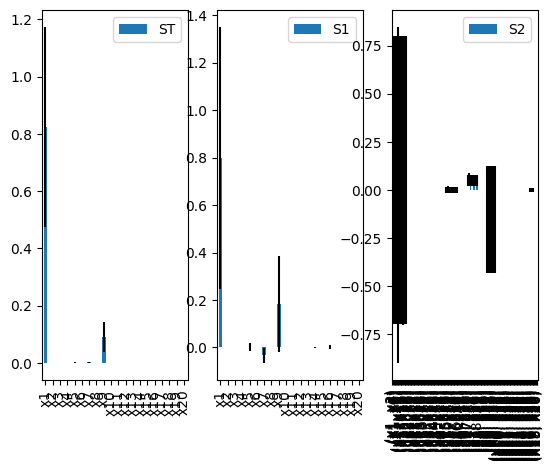

In [ ]:
# Read samples Y
Y = np.array(result_X)


# Perform analysis (auto display)
Si = sobol.analyze(inputs, Y, print_to_console=True)


Si.plot()
plot.show()

# Appendix

## model runnning

In [ ]:
result_X = CCC_system()

## data generation(X)

In [ ]:
data_ganeration = []
for i in range(len(result_time)):
  data_ganeration_i = []
  data_ganeration_i.append(result_time[i])
  for j in range(run_num):
    data_ganeration_i.append(result_X[j][i])
  data_ganeration.append(data_ganeration_i)

for i in range(len(data_ganeration)):
  CV = statistics.stdev(data_ganeration[i][1:100])/statistics.mean(data_ganeration[i][1:100])
  list_X_CV.append(CV)

## file saving

In [ ]:
#6.1 細胞密度
with open("./result_cell.csv", "w") as f:
  f.write(f"X (cells/L)\n")
  for i in range(scale):
    f.write(f"{result_X[i]}\n")

In [ ]:
#6.2 培地濃度
with open("./result_medium (mean).csv", "w") as f:
  f.write(f"Cglc0_cell,Clac0_cell,Cgln0_cell,Camm0_cell,Cglc0_algae,Clac0_algae,Cgln0_algae,Camm0_algae\n")
  f.write(f"{Cglc0_cell},{Clac0_cell},{Cgln0_cell},{Camm0_cell},{Cglc0_algae},{Clac0_algae},{Cgln0_algae},{Camm0_algae}\n")

In [ ]:
#6.2 培地濃度
with open("./result_medium (SD).csv", "w") as f:
  f.write(f"SD_Cglc0_cell,SD_Clac0_cell,SD_Cgln0_cell,SD_Camm0_cell,SD_Cglc0_algae,SD_Clac0_algae,SD_Cgln0_algae,SD_Camm0_algae\n")
  f.write(f"{SD_Cglc0_cell},{SD_Clac0_cell},{SD_Cgln0_cell},{SD_Camm0_cell},{SD_Cglc0_algae},{SD_Clac0_algae},{SD_Cgln0_algae},{SD_Camm0_algae}\n")

## graph illustration

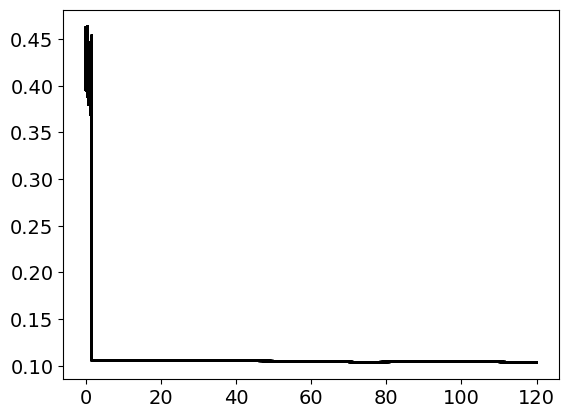

In [ ]:
import matplotlib.pyplot as plt

for i in range(run_num):
  #表示するデータを用意
  x = result_time[0:7200]
  y = list_X_CV[0:7200]

  #データをplotメソッドでプロット
  plt.rcParams["font.size"] = 14
  plt.rcParams['font.family'] = 'Arial'
  plt.plot(x, y, color = 'black')

## data generation(X,CV)

In [ ]:
#5. csvファイルの作成
#ファイルが重すぎるため，対処法を考えなければならない．例えば，ピークのみ抽出するなど

with open("./result3.csv", "w") as f:
  f.write(f"i,time,X_mean(cells/L),X_CV (-)\n")
  for i in range(len(list_time_i)):
    f.write(f"{i},{list_time_i[i]},{list_X_mean[i]},{list_X_CV[i]}\n")

NameError: name 'list_time_i' is not defined